# Проект: Линейные модели в машинном обучении

**Описание проекта**

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!

Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:

1. Первая будет прогнозировать возможный удой коровы (целевой признак `Удой`);
2. Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак `Вкус молока`).

С помощью модели нужно отобрать коров по двум критериям:
- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.

**Описание данных**

Вы будете работать с тремя датасетами:
- ferma_main.csv;
- ferma_dad.csv;
- cow_buy.csv.

Файл `ferma_main.csv` содержит данные о стаде фермера на текущий момент. Описание данных:

- `id` — уникальный идентификатор коровы.
- `Удой, кг` — масса молока, которую корова даёт в год (в килограммах).
- `ЭКЕ (Энергетическая кормовая единица)` — показатель питательности корма коровы.
- `Сырой протеин, г` — содержание сырого протеина в корме (в граммах).
- `СПО (Сахаро-протеиновое соотношение)` — отношение сахара к протеину в корме коровы.
- `Порода` — порода коровы.
- `Тип пастбища` — ландшафт лугов, на которых паслась корова.
порода папы_быка — порода папы коровы.
- `Жирность,%` — содержание жиров в молоке (в процентах).
- `Белок,%` — содержание белков в молоке (в процентах).
- `Вкус молока` — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Признаки в датасете `ferma_main.csv` можно разделить на группы.
- Характеристики коровы: id, Порода, порода папы_быка, Возраст.
- Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
- Характеристика пастбища: Тип пастбища.
- Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.
Такое разделение поможет вам понять, как взаимосвязаны признаки в датасете.

Файл `ferma_dad.csv` хранит имя папы каждой коровы в стаде фермера. Описание данных:

- `id` — уникальный идентификатор коровы.
- `Имя Папы` — имя папы коровы.

Файл `cow_buy.csv` — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:

- `Порода` — порода коровы.
- `Тип пастбища` — ландшафт лугов, на которых паслась корова.
- `порода папы_быка` — порода папы коровы.
- `Имя_папы` — имя папы коровы.
- `Текущая_жирность,%` — содержание жиров в молоке (в процентах).
- `Текущий_уровень_белок,%` — содержание белков в молоке (в процентах).
- `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Данные в файлах `ferma_main.csv` и `cow_buy.csv` похожи, но у датасета `cow_buy.csv` несколько особенностей.
- Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
- Параметры корма `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г` и `СПО (Сахаро-протеиновое соотношение)` отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
- Кроме того, отсутствуют признаки `Удой, кг` и `Вкус молока`. Это целевые признаки, именно их предстоит предсказать!

**Импорт библиотек**

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

!pip install phik
import phik

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.metrics import (
    recall_score, 
    precision_score, 
    confusion_matrix, 
    accuracy_score,
    mean_absolute_error,
    r2_score,
    mean_squared_error
)

     |████████████████████████████████| 686 kB 2.2 MB/s eta 0:00:01


## Загрузка данных

### Запись данных в датафреймы и вывод общей информации

In [2]:
try:
    ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';')
except:    
    ferma_main = pd.read_csv('D:/Данные/ferma_main.csv', sep=';')

try:
    ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
except:    
    ferma_dad = pd.read_csv('D:/Данные/ferma_dad.csv', sep=';')

try:
    cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';')
except:    
    cow_buy = pd.read_csv('D:/Данные/cow_buy.csv', sep=';')

for n in [ferma_main, ferma_dad, cow_buy]:
    display(n.head(3))
    display(n.tail(3))
    display(n.info())        

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет


,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
631,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
632,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
633,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

None

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин


,id,Имя Папы
626,627,Барин
627,628,Барин
628,629,Соловчик


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
17,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,77","3,053",менее_2_лет
18,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,34","3,069",более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


None

### Переименование столбцов

In [3]:
# переименование столбцов
ferma_main = ferma_main.rename(columns={'Удой, кг': 'удой', \
'ЭКЕ (Энергетическая кормовая единица)': 'эке', \
'Сырой протеин, г': 'сырой_протеин', \
'СПО (Сахаро-протеиновое соотношение)': 'спо', \
'Порода': 'порода', \
'Тип пастбища': 'тип_пастбища', \
'порода папы_быка': 'порода_папы_быка', \
'Жирность,%': 'жирность', \
'Белок,%': 'белок', \
'Вкус молока': 'вкус_молока', \
'Возраст': 'возраст'})

ferma_dad = ferma_dad.rename(columns={'Имя Папы': 'имя_папы'})

cow_buy = cow_buy.rename(columns={'Порода': 'порода', \
'Тип пастбища': 'тип_пастбища', \
'порода папы_быка': 'порода_папы_быка', \
'Имя_папы': 'имя_папы', \
'Текущая_жирность,%': 'текущая_жирность', \
'Текущий_уровень_белок,%': 'текущий_уровень_белок', \
'Возраст': 'возраст'})


In [4]:
# проверка
for n in [ferma_main, ferma_dad, cow_buy]:
    display(n.columns) 

Index(['id', 'удой', 'эке', 'сырой_протеин', 'спо', 'порода', 'тип_пастбища',
       'порода_папы_быка', 'жирность', 'белок', 'вкус_молока', 'возраст'],
      dtype='object')

Index(['id', 'имя_папы'], dtype='object')

Index(['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы',
       'текущая_жирность', 'текущий_уровень_белок', 'возраст'],
      dtype='object')

### Промежуточный вывод

После записи датасета в переменные `ferma_main`, `ferma_dad`, `cow_buy` и первичного знакомства с данными видим:

Датафрейм `ferma_main` содержит 12 столбцов и 634 строки. 
Столбцы, содержащие данные об идентификаторе коровы, массе молока и содержании сырого протеина в корме имеют целочисленный тип данных. 
Остальные столбцы: 'эке', 'спо', 'порода', 'тип_пастбища', 'порода_папы_быка', 'жирность', 'белок', 'вкус_молока', 'возраст' - строковый тип данных.

Датафрейм `ferma_dad` содержит 2 столбца и 629 строк. 
Столбец, содержащий данные об идентификаторе коровы, имеет целочисленный тип данных. 
Столбец с именем папы коровы - строковый тип данных.

Датафрейм `cow_buy` содержит 7 столбцов и 20 строк. 
Столбцы: 'порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы', 'текущая_жирность', 'текущий_уровень_белок', 'возраст' имеют строковый тип данных. 

Также видим, что датасет не содержит пропуски.

Были преобразованы названия столбцов в "змеиный" регистр, а также в некоторых случаях - сокращены наименования столбцов.

В датафреймах `ferma_main` и  `ferma_dad`, содержащих информацию о стаде фермера, различается количество строк. Необходимо удалить возможные дубликаты на следующем шаге.

## Предобработка данных

### Удаление дубликатов

In [5]:
for n in [ferma_main, ferma_dad, cow_buy]:
    display(f'Кол-во дубликатов {n.duplicated().sum()}')

ferma_main = ferma_main.drop_duplicates().reset_index(drop=True)
cow_buy = cow_buy.drop_duplicates().reset_index(drop=True)

for n in [ferma_main, ferma_dad, cow_buy]:
    display(f'Кол-во дубликатов после удаления {n.duplicated().sum()}')
    
for n in [ferma_main, ferma_dad, cow_buy]:
    display(f'Кол-во строк и столбцов {n.shape}')

'Кол-во дубликатов 5'

'Кол-во дубликатов 0'

'Кол-во дубликатов 4'

'Кол-во дубликатов после удаления 0'

'Кол-во дубликатов после удаления 0'

'Кол-во дубликатов после удаления 0'

'Кол-во строк и столбцов (629, 12)'

'Кол-во строк и столбцов (629, 2)'

'Кол-во строк и столбцов (16, 7)'

После удаления явных дубликатов количество строк в датафремах `ferma_main` и  `ferma_dad` стало одинаковым.

### Обработка неявных дубликатов

In [6]:
def func(list_col, data):
    for col_l in list_col:
        print('-'* 50)
        print(col_l, data[col_l].sort_values().unique())    
        
func(['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст'], ferma_main)
func(['имя_папы'], ferma_dad)
func(['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы', 'возраст'], cow_buy)

--------------------------------------------------
порода ['Вис Бик Айдиал' 'РефлешнСоверинг']
--------------------------------------------------
тип_пастбища ['Равнинное' 'Равнинные' 'Холмистое']
--------------------------------------------------
порода_папы_быка ['Айдиал' 'Айдиалл' 'Соверин']
--------------------------------------------------
вкус_молока ['вкусно' 'не вкусно']
--------------------------------------------------
возраст ['более_2_лет' 'менее_2_лет']
--------------------------------------------------
имя_папы ['Барин' 'Буйный' 'Геркулес' 'Соловчик']
--------------------------------------------------
порода ['Вис Бик Айдиал' 'РефлешнСоверинг']
--------------------------------------------------
тип_пастбища ['равнинное' 'холмистое']
--------------------------------------------------
порода_папы_быка ['Айдиал' 'Соверин']
--------------------------------------------------
имя_папы ['Барин' 'Буйный' 'Геркулес' 'Соловчик']
--------------------------------------------------
во

 - В датафрейме `ferma_main`: 
     - приведем названия типов пастбища 'Равнинное' и 'Равнинные' к одному значению - 'Равнинное',
     - те же действия произведем с наименованиями пород папы быка 'Айдиал' и 'Айдиалл' - 'Айдиал'.
 - В датафрейме `cow_buy`: 
     - в названиях типов пастбища скоррейтируем первую букву на заглавную, как в датафрейме `ferma_main`.

In [7]:
ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].replace('Равнинные', 'Равнинное')
ferma_main['порода_папы_быка'] = ferma_main['порода_папы_быка'].replace('Айдиалл', 'Айдиал')
cow_buy['тип_пастбища'] = cow_buy['тип_пастбища'].replace('равнинное', 'Равнинное')
cow_buy['тип_пастбища'] = cow_buy['тип_пастбища'].replace('холмистое', 'Холмистое')

func(['тип_пастбища', 'порода_папы_быка'], ferma_main)
func(['тип_пастбища'], cow_buy)

--------------------------------------------------
тип_пастбища ['Равнинное' 'Холмистое']
--------------------------------------------------
порода_папы_быка ['Айдиал' 'Соверин']
--------------------------------------------------
тип_пастбища ['Равнинное' 'Холмистое']


### Преобразование типов данных

Первым шагом заменяем разделитель точкой на запятую в столбцах, где на следующем шаге будет меняться тип данных на вещественный.
Вторым шагом меняем тип данных. 

In [8]:
ferma_main[['эке', 'спо', 'жирность', 'белок']] = ferma_main[['эке', 'спо', 'жирность', 'белок']].replace(',', '.', regex=True)
cow_buy[['текущая_жирность', 'текущий_уровень_белок']] = cow_buy[['текущая_жирность', 'текущий_уровень_белок']].replace(',', '.', regex=True)

for n in [ferma_main, cow_buy]:
    display(n.head(2))

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
0,1,5863,14.2,1743,0.89,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.89,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет


,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет


In [9]:
ferma_main[['эке', 'спо', 'жирность', 'белок']] = ferma_main[['эке', 'спо', 'жирность', 'белок']].astype('float32')
ferma_main[['id', 'удой', 'сырой_протеин']] = ferma_main[['id', 'удой', 'сырой_протеин']].astype('int32')

cow_buy[['текущая_жирность', 'текущий_уровень_белок']] = cow_buy[['текущая_жирность', 'текущий_уровень_белок']].astype('float32')

for n in [ferma_main, cow_buy]:
    display(n.dtypes)
    display(n.head(2))

id                    int32
удой                  int32
эке                 float32
сырой_протеин         int32
спо                 float32
порода               object
тип_пастбища         object
порода_папы_быка     object
жирность            float32
белок               float32
вкус_молока          object
возраст              object
dtype: object

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
0,1,5863,14.2,1743,0.89,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.89,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет


порода                    object
тип_пастбища              object
порода_папы_быка          object
имя_папы                  object
текущая_жирность         float32
текущий_уровень_белок    float32
возраст                   object
dtype: object

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет


### Промежуточный вывод

Удалены дубликаты в датафремах `ferma_main` и `cow_buy`.   
После удаления количество строк в датафреймах `ferma_main` и  `ferma_dad`, содержащих информацию о стаде фермера, стало одинаковым.

Обработаны неявные дубликаты в столбцах с информацией о типах пастбищ и наименованиях пород в датафремах `ferma_main` и `cow_buy`.  

Преобразованы типы данных в вещественный в столбцах 'эке', 'спо', 'жирность', 'белок' датафрема `ferma_main` и столбцах 'текущая_жирность', 'текущий_уровень_белок' датафрема `cow_buy`. 
Колонки 'id', 'удой', 'сырой_протеин' в датафреме `ferma_main` изменены в целочисленный тип.


## Исследовательский анализ данных

### Описание стада фермера на текущий момент

датафремы `ferma_main` и `ferma_dad`

#### Статистики

In [10]:
display(ferma_main.describe())

,id,удой,эке,сырой_протеин,спо,жирность,белок
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.799999,2349.000000,0.960000,3.750000,3.085000


#### Распределение количественных признаков

<Figure size 432x288 with 0 Axes>

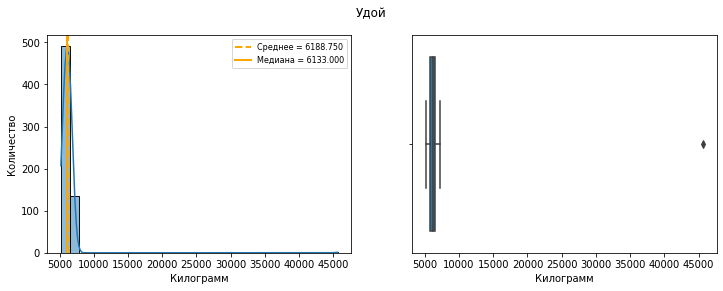

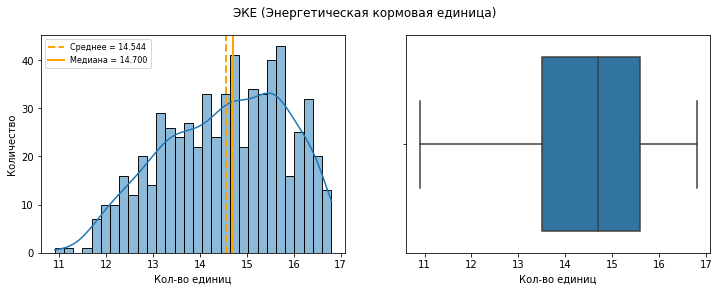

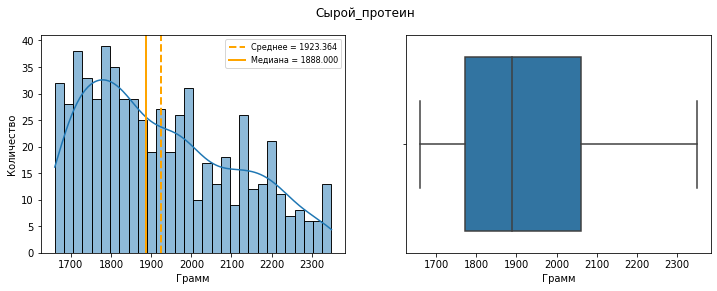

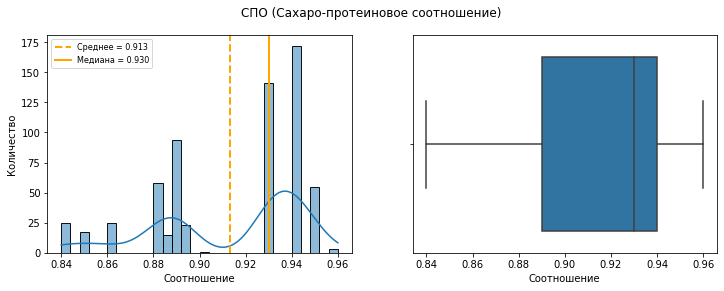

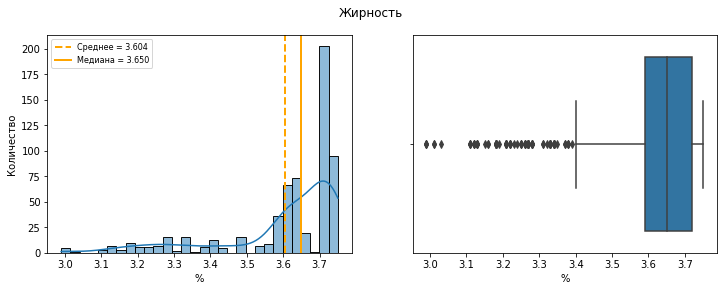

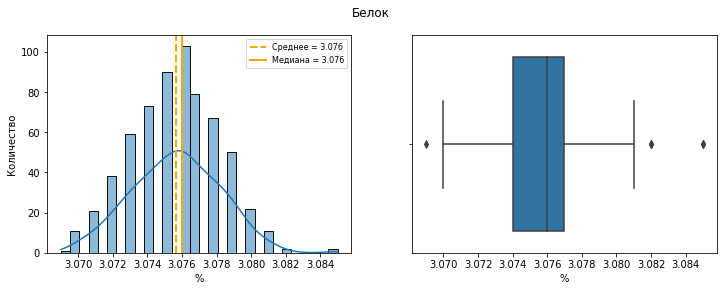

In [11]:
for i, col in enumerate(ferma_main[['удой', 'эке', 'сырой_протеин', 'спо', 'жирность', 'белок']]):
    
    x_label = ('Килограмм' if col in ['удой'] 
         else 'Кол-во единиц' if col in ['эке'] 
         else 'Грамм' if col in ['сырой_протеин'] 
         else 'Соотношение' if col in ['спо']  
         else '%') 
    title_name = ('ЭКЕ (Энергетическая кормовая единица)' if col in ['эке'] 
         else 'СПО (Сахаро-протеиновое соотношение)' if col in ['спо'] 
         else col[0].upper() + col[1:].lower())
    
    mean_value = ferma_main[col].mean()
    median_value = ferma_main[col].median()
    
    plt.figure(i)
    
    fig, axs = plt.subplots(nrows = 1 , ncols = 2, figsize = (12,4))
    
    sns.histplot(data = ferma_main, x = ferma_main[col], ax=axs[0], kde=True, bins = 30)
    axs[0].axvline(mean_value, linewidth=2, color='orange', alpha=1, linestyle='--', label = 'Среднее = {:.3f}'.format(mean_value))
    axs[0].axvline(median_value, linewidth=2, color='orange', alpha=1, linestyle='-', label = 'Медиана = {:.3f}'.format(median_value))
    axs[0].set_xlabel(x_label)
    axs[0].set_ylabel('Количество')
    axs[0].legend(fontsize="8")

    sns.boxplot(data = ferma_main, x = ferma_main[col], ax=axs[1])
    axs[1].set_xlabel(x_label)
    fig.suptitle(title_name)    


В данных об удое коров в текущем стаде фермера есть выброс, одна строка - 45 тысяч кг. Удалим ее и повторно отрисуем гистограмму.

Text(0.5, 0.98, 'Удой')

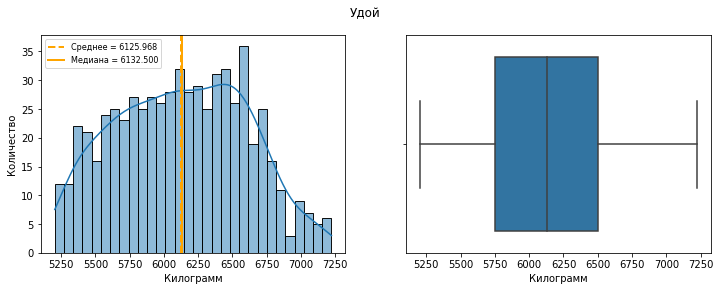

In [12]:
ferma_main = ferma_main.query('удой < 7500')

mean_value = ferma_main['удой'].mean()
median_value = ferma_main['удой'].median()

fig, axs = plt.subplots(nrows = 1 , ncols = 2, figsize = (12,4))

sns.histplot(data = ferma_main, x = 'удой', ax=axs[0], kde=True, bins = 30)
axs[0].axvline(mean_value, linewidth=2, color='orange', alpha=1, linestyle='--', label = 'Среднее = {:.3f}'.format(mean_value))
axs[0].axvline(median_value, linewidth=2, color='orange', alpha=1, linestyle='-', label = 'Медиана = {:.3f}'.format(median_value))
axs[0].set_xlabel('Килограмм')
axs[0].set_ylabel('Количество')
axs[0].legend(fontsize="8")

sns.boxplot(data = ferma_main, x = 'удой', ax=axs[1])
axs[1].set_xlabel('Килограмм')
fig.suptitle('Удой')


Пересчитаем также статистики

In [13]:
display(ferma_main.describe())

,id,удой,эке,сырой_протеин,спо,жирность,белок
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000
mean,315.474522,6125.968153,14.548727,1923.759554,0.913089,3.604268,3.075670
std,181.475367,475.857053,1.301777,182.832816,0.032221,0.168093,0.002551
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.750000,5749.750000,13.500000,1771.750000,0.890000,3.590000,3.074000
50%,315.500000,6132.500000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.250000,6501.000000,15.600000,2062.250000,0.940000,3.720000,3.077000
max,629.000000,7222.000000,16.799999,2349.000000,0.960000,3.750000,3.085000


В стаде фермера 628 коров.

В среднем в год каждая корова приносит 6126 кг молока или 6133 кг молока (медиана). Небольшая разница `удоя` между медианой и средним арифметическим показывает, что выборка однородная. На диаграммах видим отсутствие выбросов. Распределение удоя - умеренно ассиметричное.

Показатель энергии корма `Энергетическая кормовая единица` также распределен умеренно ассиметрично. Медиана - 14,7 единиц, среднее - 14,5 единиц. Выборка однородная, выбросы отсутствуют. Отдельно рассмотрены (ниже) 3 объекта из выборки, у которых показатель варьируется от 10,9 до 11,7 единиц, что выделяется из общего распределения. У данных коров прочие признаки находятся в переделах нормы, и также минимальное значение показателя энергии корма, 10,9 единиц, находится в пределах 3 стандартных отклонений относительно медины. Поэтому строки с данными оставляем.

Среднее содержание `сырого протеина` в корме - 1924 г, медианное значение - 1888 г. Небольшое превышение среднего над медианой показывает, что для большего количества коров (347) характерно содержание протеина в корме ниже среднего. Минимальное значение в 1660 г удалено от медианы на 1,3 стандатных отклонения, максимальное - 2349 г, удалено от медианы дальше - на 2,5 стандатных отклонения.
В целом можно сделать вывод, что выборка однородная, заметные выбросы отсутствуют.

Признак `СПО (Сахаро-протеиновое соотношение)` имеет мультимодальное распределение с двумя пиками. Таким образом, можно выделить две или даже три группы по отношению сахара к протеину в корме коровы :
1. от 0,84 до 0,86 - 67 коров;
2. 0,88-0,9 - 191 корова;
3. 0,93-0,96 - 370 коров.

Среднее содержание `жиров в молоке` - 3,6 %, медианное значение - 3,65 %. Среднее арифмитическое смещено относительно медианы влево - молоко некоторых коров имеет низкий уровень жирности -  от 3 до 3,4 %%. "Усы" ящичной диаграммы показывают, что основная часть стада фермера дают молоко жирностью от 3,4 до 3,75 %%. Таких коров в стаде насчитывается 542 или 86 %. 

Распределение признака `Белок` напоминает нормальное: диаграмма имеет один пик, среднее арифмитическое и медиана равны со значением 3,076 %, большая часть значений стремится к среднему значению выборки. Однако видим несколько выбросов со значениями содержания белков в молоке ниже 3,07 % или выше 3,081 %. Посмотрим на них отдельно (ниже).У данных коров прочие признаки находятся в переделах нормы, строки с данными оставляем.

In [14]:
display(ferma_main.query('эке < 11.8'))

display(ferma_main.query('белок < 3.07 or белок > 3.081'))


,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
456,457,5288,11.1,1925,0.88,РефлешнСоверинг,Равнинное,Соверин,3.33,3.074,не вкусно,менее_2_лет
576,577,5376,11.7,1825,0.86,РефлешнСоверинг,Равнинное,Соверин,2.99,3.076,не вкусно,менее_2_лет
581,582,5573,10.9,1955,0.84,Вис Бик Айдиал,Холмистое,Соверин,3.39,3.079,вкусно,менее_2_лет


,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
77,78,5871,14.7,1795,0.895,Вис Бик Айдиал,Равнинное,Айдиал,3.61,3.082,вкусно,более_2_лет
240,241,5568,13.4,1733,0.880,Вис Бик Айдиал,Равнинное,Соверин,3.63,3.069,не вкусно,менее_2_лет
426,427,6701,15.7,2068,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.72,3.082,вкусно,более_2_лет
471,472,5883,14.9,2159,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.62,3.085,вкусно,более_2_лет
517,518,5819,13.7,1968,0.840,Вис Бик Айдиал,Холмистое,Айдиал,3.15,3.085,вкусно,более_2_лет


#### Распределение качественных признаков

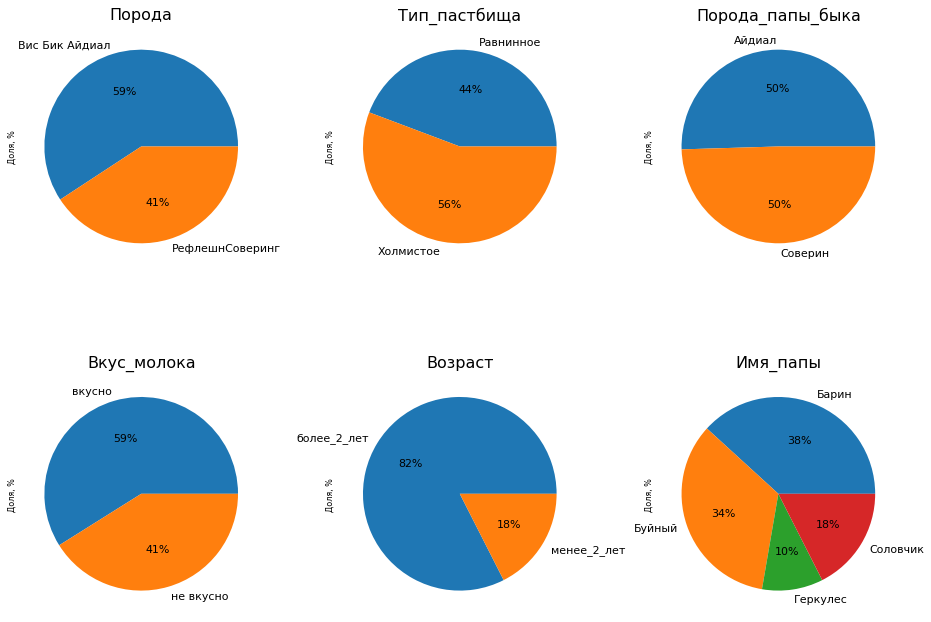

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 13))
df1 = ferma_main.merge(ferma_dad, how='left', on='id')[['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст', 'имя_папы']]


for i, col in enumerate(df1):
    
    x = (0 if i < 3 else 1) 
    y = (i-3 if i > 2 else i) 
    
    df = df1.groupby(col).agg(prop=(col, 'count')).reset_index()
    axes[x, y].pie(df['prop'], labels = df[col], autopct='%1.0f%%', textprops={'fontsize': 11})
    axes[x, y].set_ylabel('Доля, %', fontsize=8)
    axes[x, y].set_title(col[0].upper() + col[1:].lower(), fontsize=16)
    fig.tight_layout(pad=1.0)

del df
del df1

Стадо фермера представлено двумя `породами` буренок: "Вис Бик Айдиал" и "Рефлешн Соверинг", преобладает первая с долей 59 %.

Ландшафт лугов, на которых пасутся коровы, бывает равнинным или холмистым, второй `тип пастбища` превалирует с долей 56 %.

Принадлежность буренок к `породе папы быка` делится поровну между "Айдиал" и "Соверин".

По критериям фермера 59 % буренок дают `вкусное молоко`.

В стаде преобладают взрослые коровы `возрастом` более 2 лет - 82 %, остальные буренки младше 2 лет.

Коровы происходят от 4 быков, `имя папы` и доля,% : Барин - 38 %, Буйный - 34 %, Соловчик - 18 %, Геркулес - 10 %.

### Данные о коровах «ЭкоФермы»

датафрейм `cow_buy`

#### Статистики

In [16]:
display(cow_buy.describe())

,текущая_жирность,текущий_уровень_белок
count,16.000000,16.000000
mean,3.571875,3.068250
std,0.141620,0.011264
min,3.340000,3.046000
25%,3.415000,3.059500
50%,3.585000,3.073500
75%,3.692500,3.076750
max,3.770000,3.081000


#### Распределение количественных признаков

<Figure size 432x288 with 0 Axes>

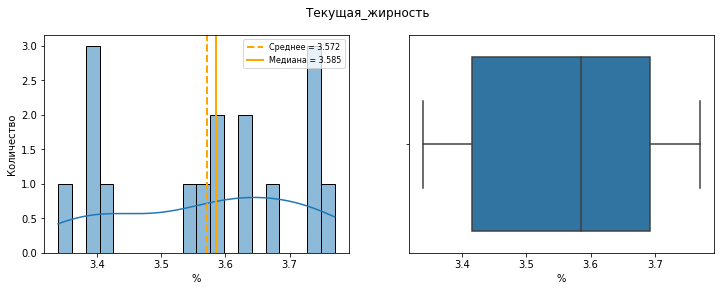

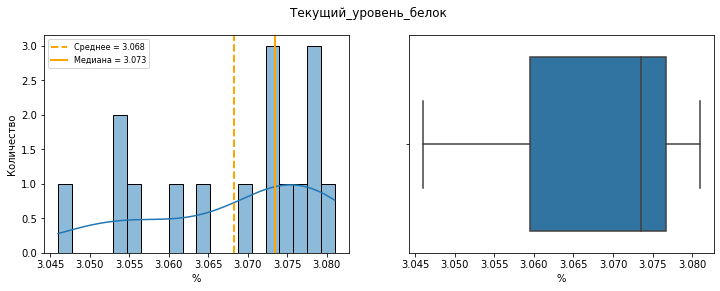

In [17]:
for i, col in enumerate(cow_buy[['текущая_жирность', 'текущий_уровень_белок']]):
    
    mean_value = cow_buy[col].mean()
    median_value = cow_buy[col].median()
    
    plt.figure(i)
    
    fig, axs = plt.subplots(nrows = 1 , ncols = 2, figsize = (12,4))
    
    sns.histplot(data = cow_buy, x = cow_buy[col], ax=axs[0], kde=True, bins = 20)
    axs[0].axvline(mean_value, linewidth=2, color='orange', alpha=1, linestyle='--', label = 'Среднее = {:.3f}'.format(mean_value))
    axs[0].axvline(median_value, linewidth=2, color='orange', alpha=1, linestyle='-', label = 'Медиана = {:.3f}'.format(median_value))
    axs[0].set_xlabel('%')
    axs[0].set_ylabel('Количество')
    axs[0].legend(fontsize="8")

    sns.boxplot(data = cow_buy, x = cow_buy[col], ax=axs[1])
    axs[1].set_xlabel('%')
    fig.suptitle(col[0].upper() + col[1:].lower())    


В стаде буренок "ЭкоФермы" разброс значений жирности и белка молока меньше, чем в стаде фермера. 
Выбросов в данных нет.

Среднее значение показателя `текущая жирность` - 3,57 %, медианное значение - 3,59 %. 

Среднее значение признака  `текущий уровень белка` - 3,068 %, медианное значение - 3,073 %.


#### Распределение качественных признаков

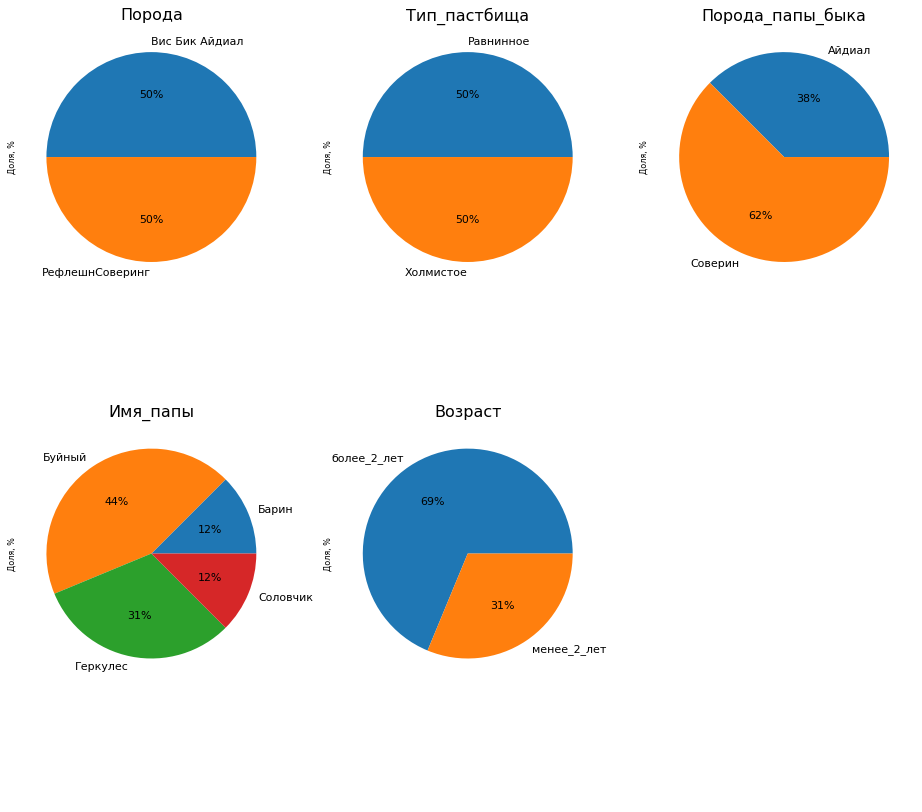

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 13))
df1 = cow_buy[['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы', 'возраст']]


for i, col in enumerate(df1):
    
    x = (0 if i < 3 else 1) 
    y = (i-3 if i > 2 else i) 
    
    df = df1.groupby(col).agg(prop=(col, 'count')).reset_index()
    axes[x, y].pie(df['prop'], labels = df[col], autopct='%1.0f%%', textprops={'fontsize': 11})
    axes[x, y].set_ylabel('Доля, %', fontsize=8)
    axes[x, y].set_title(col[0].upper() + col[1:].lower(), fontsize=16)
    fig.tight_layout(pad=1.0)
    
axes[1,2].set_axis_off()

del df
del df1

Буренки "ЭкоФермы" представлены поровну двумя `породами`: "Вис Бик Айдиал" и "Рефлешн Соверинг".

`Типы пастбища`, на которых пасутся коровы, также разделены поровну между равнинным и холмистым.

`Порода папы быка` "Соверин" преобладает над "Айдиал" с долей 62 %.

В стаде больше взрослых коров `возрастом` более 2 лет - 69 %, остальные буренки младше 2 лет.

Коровы происходят от 4 быков, `имя папы` и доля,% : Буйный - 44 %, Геркулес - 31 %, Соловчик и Барин - по 12 % каждый.


### Промежуточный вывод

Был проведен статистический анализ всех признаков. 

Для количественных признаков были посчитаны статистики и отрисованы гистограммы и диаграммы размаха "ящик с усами".
Графики распределения удоя коров в стаде фермера помогли выявить выброс. Для улучшения данных выброс был удален.

Распределение признаков `Удой`, `Энергетическая кормовая единица` и `Сырой протеин` - умеренно ассиметричное.

Признак `СПО (Сахаро-протеиновое соотношение)` имеет мультимодальное распределение с двумя пиками, в котором выделяются 3 группы.

Распределение признака `Жирность` ассиметричное, пик на диаграмме сдвинут вправо, т.к. 86 % коров дают молоко жирностью от 3,4 до 3,75 %%. 

Распределение признака `Белок` напоминает нормальное: диаграмма имеет один пик, среднее арифмитическое и медиана равны со значением 3,076 %, большая часть значений стремится к среднему значению выборки. 

В стаде фермера 628 коров, в среднем приносящие 6133 кг молока в год. 

Средние показатели: 
- питательности корма `Энергетическая кормовая единица` - 14,7 единиц;
- содержания `сырого протеина` в корме - 1888 г.
- `жиров в молоке` - 3,65 %.  86 % буренок дают молоко жирностью от 3,4 до 3,75 %%. 
- `белка в молоке` - 3,076 %.

Анализ признака `СПО (Сахаро-протеиновое соотношение)` показал возможность выделить три группы по отношению сахара к протеину в корме коровы :
1. от 0,84 до 0,86 - 67 коров;
2. 0,88-0,9 - 191 корова;
3. 0,93-0,96 - 370 коров.

В стаде "ЭкоФермы"  - 16 коров для продажи.

Средние показатели молока буренок "ЭкоФермы": 
- `текущая жирность` - 3,59 %. 
- `текущий уровень белка` - 3,073 %.

Выбросов в данных нет.


Для категориальных признаков отрисованы круговые диаграммы.

В стаде фермера, как и в "ЭкоФерме" представлены две `породы` коров: "Вис Бик Айдиал" и "Рефлешн Соверинг". В стаде фермера 59 % буренок "Вис Бик Айдиал", в "ЭкоФерме" - равное количество обоих пород.

Ландшафт лугов, на которых пасутся коровы, бывает равнинным или холмистым. Большинство буренок фермера паслись на холмистых лугах - таких 56 %, равное количество коровок "ЭкоФермы" паслись на обоих `типах пастбищ`.

В стаде фермера принадлежность буренок к `породе папы быка` делится поровну между "Айдиал" и "Соверин", в "ЭкоФерме" "Соверин" преобладает с долей 62 %.

В стаде фермера, как и в "ЭкоФерме" коров `возрастом` более 2 лет больше, чем тех, что младше 2 лет. В стаде фермера взрослых буренок - 82 %, в "ЭкоФерме" - 69 %.

Коровы происходят от 4 быков, в стаде фермера и "ЭкоФерме" представлены соотвественно: Барин - 38 % и 12 %, Буйный - 34 % и 44 %, Соловчик - 18 % и 12 %, Геркулес - 10 % и 31 %.

По критериям фермера 59 % буренок дают `вкусное молоко`.


## Корреляционный анализ

### Коэффициенты корреляции и тепловая карта

В связи с тем, что нам необходимо найти взаимосвязь между целевыми признаками `Удой`, `Вкус молока` с входными признаками как количественными, так и категориальными, а также выявленным ранее фактом, что не все количественные признаки распределены нормально, для рассчета корреляции используем средства Phik, которые устойчивы к выбросам и ненормальному распределению. 

,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
удой,1.000000,0.720719,0.463224,0.661359,0.164744,0.279540,0.519915,0.708455,0.153048,0.173122,0.998101
эке,0.720719,1.000000,0.456484,0.591190,0.123086,0.106758,0.171355,0.717365,0.000000,0.272265,0.771596
сырой_протеин,0.463224,0.456484,1.000000,0.387188,0.090925,0.096474,0.000000,0.399701,0.202811,0.176480,0.351685
спо,0.661359,0.591190,0.387188,1.000000,0.062660,0.155349,0.425601,0.647598,0.000000,0.572702,0.744410
порода,0.164744,0.123086,0.090925,0.062660,1.000000,0.213218,0.089330,0.230523,0.370629,0.000000,0.057295
тип_пастбища,0.279540,0.106758,0.096474,0.155349,0.213218,1.000000,0.000000,0.000000,0.116261,0.269063,0.128455
порода_папы_быка,0.519915,0.171355,0.000000,0.425601,0.089330,0.000000,1.000000,0.000000,0.132675,0.000000,0.355817
жирность,0.708455,0.717365,0.399701,0.647598,0.230523,0.000000,0.000000,1.000000,0.053689,0.193880,0.677276
белок,0.153048,0.000000,0.202811,0.000000,0.370629,0.116261,0.132675,0.053689,1.000000,0.124230,0.000000
вкус_молока,0.173122,0.272265,0.176480,0.572702,0.000000,0.269063,0.000000,0.193880,0.124230,1.000000,0.165974


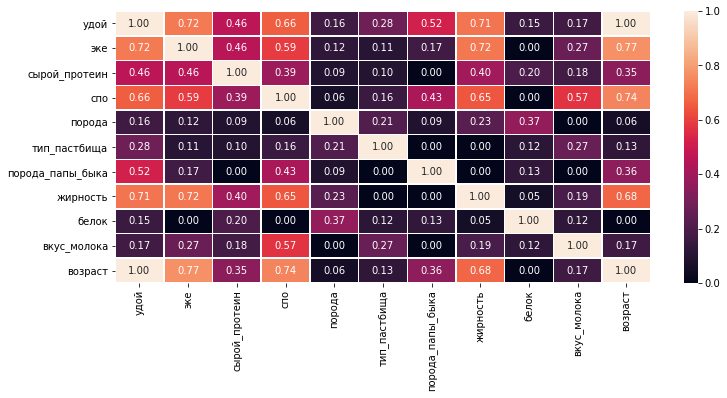

In [19]:
df_corr = ferma_main.drop('id', axis=1).phik_matrix(interval_cols=['удой', 'эке', 'сырой_протеин', 'спо', 'жирность', 'белок'])

display(df_corr)

plt.figure(figsize = (12,5))
ax = sns.heatmap(df_corr, annot=True, fmt='.2f', linewidths=.5)

Как видно из матрицы корреляции Phik, 
- целевой признак `Удой, кг` коррелирует 
    - с числовыми признаками: 
        - `ЭКЕ (Энергетическая кормовая единица)`, `Жирность,%` - коэффициенты корреляции: 0,72 и 0,71 - высокая связь;
        - `СПО (Сахаро-протеиновое соотношение)`  - коэффициент корреляции: 0,66  - заметная связь;
        - `Сырой протеин, г`  - коэффициент корреляции: 0,46  - умеренная связь;
        - `Белок,%` - коэффициент корреляции: 0,15 - незначительная связь;
    - категориальными признаками:
        - `Возраст` -  - коэффициент корреляции: 1 - очень высокая связь;
        - `Порода папы_быка` -  - коэффициент корреляции: 0,52 - заметная связь;
        - `Порода`, `Тип пастбища`, `Вкус молока` -  - коэффициенты корреляции: 0,16, 0,28, 0,17 - незначительная связь;
- целевой признак `Вкус молока` коррелирует 
    - с числовыми признаками: 
        - `СПО (Сахаро-протеиновое соотношение)`  - коэффициент корреляции: 0,57  - заметная связь;
        - `ЭКЕ (Энергетическая кормовая единица)`, `Жирность,%`, `Сырой протеин, г`, `Белок,%`, `Удой, кг` - коэффициенты корреляции: 0,27, 0,19, 0,18, 0,12, 0,17  - незначительная связь;
    - категориальными признаками:
        - `Возраст`, `Тип пастбища` -  - коэффициент корреляции: 0,17, 0,27 - незначительная связь;
        - `Порода`, `Порода папы_быка`  -  - коэффициенты корреляции: 0 - связь отсутствует.
   

Мультиколлинеарность между входными признаками не наблюдается в связи с отсутствием признаков с очень высоким уровнем корреляции от 0,9.


### Диаграммы рассеяния признака `Удой, кг` и всех количественных признаков с учётом значения категориальных признаков

<Figure size 432x288 with 0 Axes>

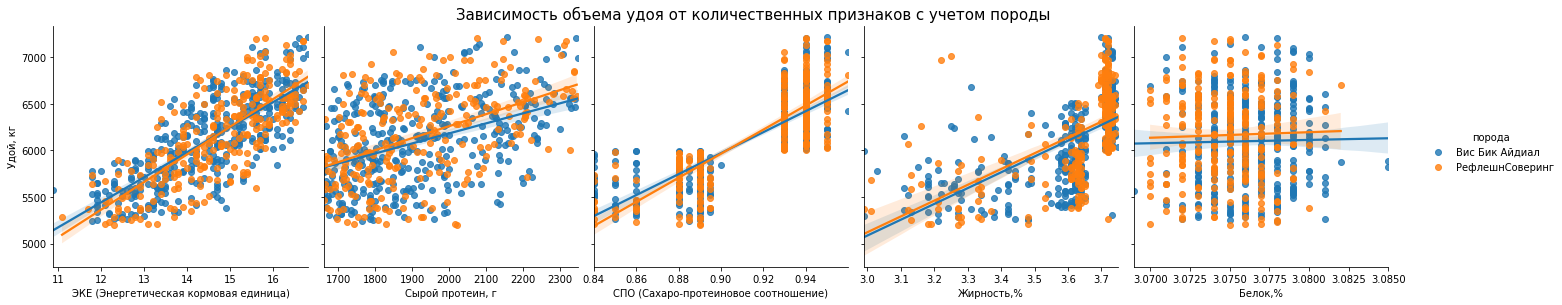

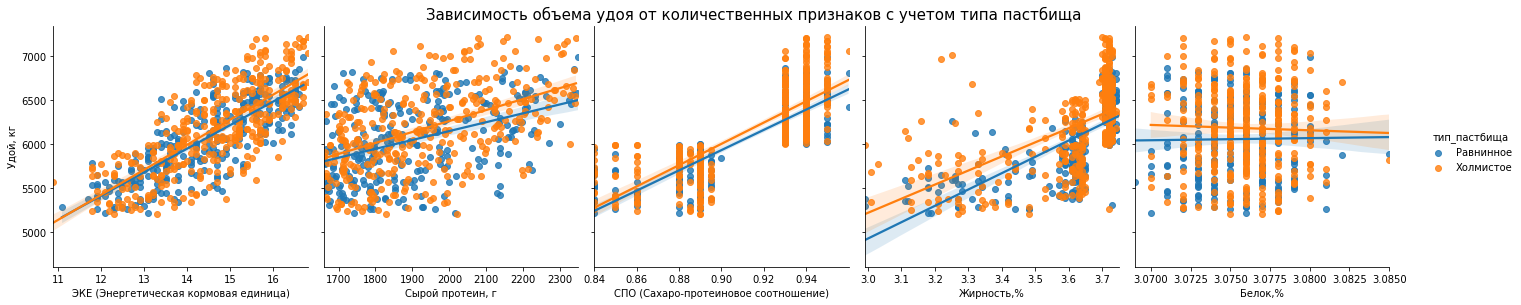

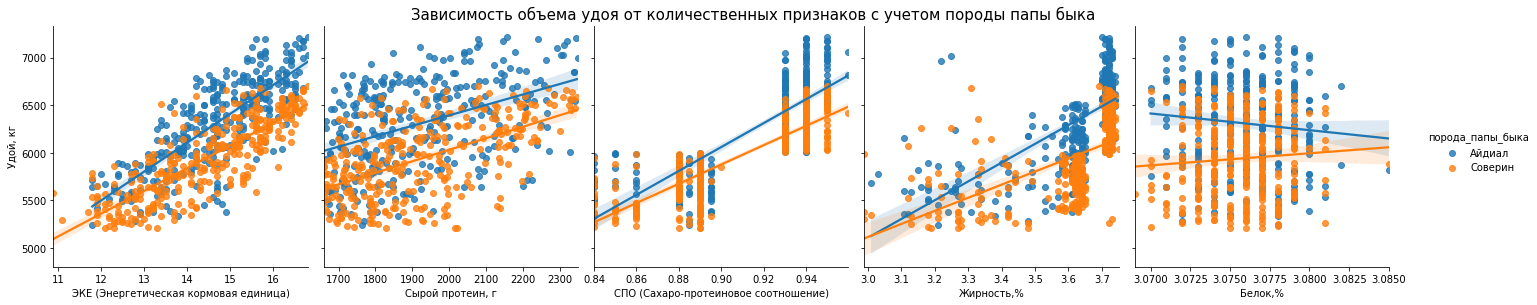

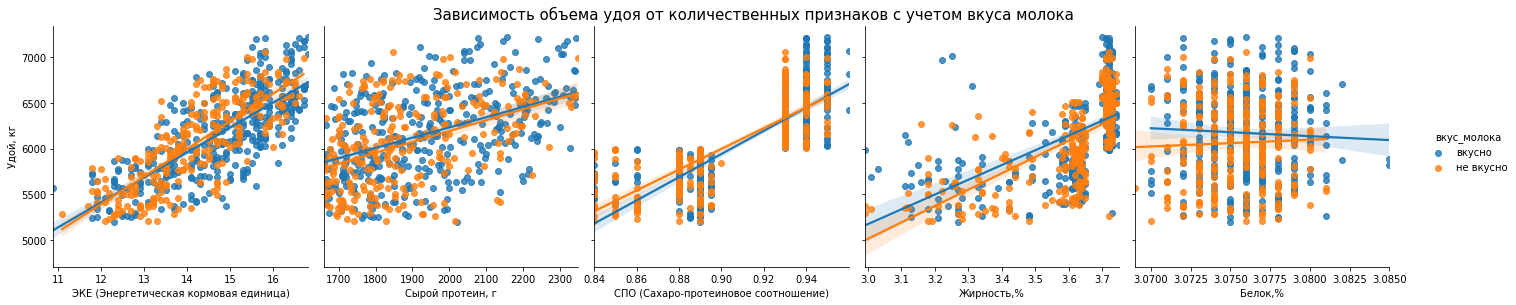

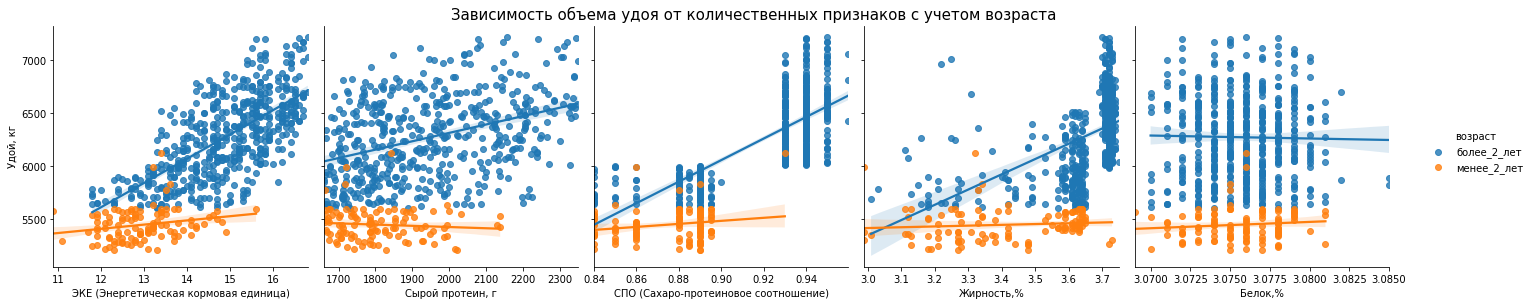

In [20]:
df = ferma_main[['удой', 'эке', 'сырой_протеин', 'спо', 'жирность', 'белок','порода', 'тип_пастбища', 'порода_папы_быка'
                 ,'вкус_молока', 'возраст']]

df = df.rename(columns={'удой': 'Удой, кг', \
'эке': 'ЭКЕ (Энергетическая кормовая единица)', \
'сырой_протеин': 'Сырой протеин, г', \
'спо': 'СПО (Сахаро-протеиновое соотношение)', \
'жирность': 'Жирность,%', \
'белок': 'Белок,%'})  

def scatter_plot(n):
    sns.pairplot(data=df, x_vars=['ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г'
                                  , 'СПО (Сахаро-протеиновое соотношение)', 'Жирность,%', 'Белок,%']
                 , y_vars='Удой, кг', hue=n, height=4, kind = "reg")
                 
for i, col in enumerate(df[['порода', 'тип_пастбища', 'порода_папы_быка','вкус_молока', 'возраст']]):

    plt.figure(i)
    scatter_plot(col)
    
    col_name = ('породы' if col in ['порода'] 
         else 'типа пастбища' if col in ['тип_пастбища'] 
         else 'породы папы быка' if col in ['порода_папы_быка'] 
         else 'вкуса молока' if col in ['вкус_молока']  
         else 'возраста') 
    
    plt.title( f'Зависимость объема удоя от количественных признаков с учетом {col_name}', size = 15, x=-1.5);
    
del df

### Промежуточный вывод

Матрица корреляции Phik показала, 
- целевой признак `Удой, кг` коррелирует 
    - с числовыми признаками: 
        - `ЭКЕ (Энергетическая кормовая единица)`, `Жирность,%` - коэффициенты корреляции: 0,72 и 0,71 - высокая связь;
        - `СПО (Сахаро-протеиновое соотношение)`  - коэффициент корреляции: 0,66  - заметная связь;
        - `Сырой протеин, г`  - коэффициент корреляции: 0,46  - умеренная связь;
        - `Белок,%` - коэффициент корреляции: 0,15 - незначительная связь;
    - категориальными признаками:
        - `Возраст` -  - коэффициент корреляции: 1 - очень высокая связь;
        - `Порода папы_быка` -  - коэффициент корреляции: 0,52 - заметная связь;
        - `Порода`, `Тип пастбища`, `Вкус молока` -  - коэффициенты корреляции: 0,16, 0,28, 0,17 - незначительная связь;
- целевой признак `Вкус молока` коррелирует 
    - с числовыми признаками: 
        - `СПО (Сахаро-протеиновое соотношение)`  - коэффициент корреляции: 0,57  - заметная связь;
        - `ЭКЕ (Энергетическая кормовая единица)`, `Жирность,%`, `Сырой протеин, г`, `Белок,%`, `Удой, кг` - коэффициенты корреляции: 0,27, 0,19, 0,18, 0,12, 0,17  - незначительная связь;
    - категориальными признаками:
        - `Возраст`, `Тип пастбища` -  - коэффициент корреляции: 0,17, 0,27 - незначительная связь;
        - `Порода`, `Порода папы_быка`  -  - коэффициенты корреляции: 0 - связь отсутствует.
   

Мультиколлинеарность между входными признаками не наблюдается в связи с отсутствием признаков с очень высоким уровнем корреляции от 0,9.


Предварительно можно сделать вывод, что для прогноза целевых признаков будут полезны входные признаки, имеющие как минимум заметную связь с целевыми: для удоя - это 4 числовых признака и 2 категориальных, для вкуса молока - только 1 числовой признак.


Зависимость `удоя` от `энергетической кормовой единицы` похожа на линейную, но в то же время в распределении точек на диаграммах в первом столбце заметна небольшая кривизна, которую в дальнейшем планируется "выпрямить" путем возведения значений признака `энергетической кормовой единицы` в квадрат.


Более хаотичное расположение точек на графиках второго столбца отражает очень слабую корреляцию между признаком `Сырой протеин, г` и `удой`.


В статистическом анализе данных было обнаружено, что признак `СПО (Сахаро-протеиновое соотношение)` имеет мультимодальное распределение с двумя пиками: выделяются 3 отдельные группы по отношению сахара к протеину в корме коровы. Диаграммы рассеяния уточняют: для `СПО` до 0.92 характерен удой до 6000 кг., в то время как для `СПО` 0.92 и выше - удой всегда превышает 6000 кг.


Для 80 % коров характерна `жирность` молока от 3,6 - 3,7 %%. Вместе с этим, можно выделить 2 группы (большие пятна на графиках, где сосредоточены большинство точек): 
- с жирностью молока от 3,55 до 3,65 %%. Для данной группы характерен удой от 5380 до 6513 кг молока в год.
- с жирностью молока от 3,69 % и выше. Для данной группы, за исключением 7 коров (отдельные точки ниже большого вертикального пятна на графиках, расположенные ниже по оси ординат),  характерен большой удой от 6159 до 7222 кг молока в год.


Между признаками `Белок, %` и `Удой, кг` отсутствует взаимосвязь: это видно на диаграммах, где для случайного значения белка удой варьируется на всем диапазоне допустимых значений.


Самое заметное отличие в распределении внутри категориальных признаков у показателя `возраст`: буренки старше 2 лет в большинстве случаев дают удой выше, чем коровы младше 2 лет, более того, удой от 6000 кг молока, за исключением одной коровы возрастом менее 2 лет, дают только коровы старше 2 лет. Заметное различие в распределении внутри категорий наблюдается для признака `Порода папы быка`: коровы, произошедшие от породы папы быка "Айдиал", чаще приносят удой больше, чем у "Соверин". Удой молока свыше 6700 кг дают только коровы с папой быком "Айдиал". В распределении внутри категорий признаков `Порода`, `Тип пастбища`, `Вкус молока` заметных отличий нет. 



## Обучение модели линейной регрессии

### Модель №1

#### Разбивка данных на тренировочную и тестовую выборки

Признаки `жирность` и `белок` исключаем, т.к. они влияют на вкус молока, но не на удой. Признак `вкус_молока` также исключаем, т.к. его нужно предсказать.

In [21]:
# создание константы RANDOM_STATE
RANDOM_STATE = 42


# считывание CSV-файла в датафрейм pandas, сохранение признаков
X = ferma_main.drop(['удой', 'id', 'жирность', 'белок', 'вкус_молока'], axis=1)
y = ferma_main['удой']

# разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

# вывод необходимых размерностей
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(471, 7)
(157, 7)
(471,)
(157,)


#### Кодирование категориальных признаков с помощью OneHotEncoder.


#### Масштабирование количественных признаков с помощью StandardScaler.

In [22]:
cat_col_names = ['порода', 
                 'тип_пастбища', 
                 'порода_папы_быка',
                 'возраст']

num_col_names = ['эке', 
                 'сырой_протеин', 
                 'спо']


# создание переменной с экземпляром класса StandardScaler()
scaler = StandardScaler()

# обучение и трансформирование количественных признаков из тренировочной выборки 
X_train_scaled = scaler.fit_transform(X_train[num_col_names])

# преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_col_names])

# создание переменной с экземпляром класса OneHotEncoder()
# включение параметра для избегания появления дамми-ошибок,
# отключение sparse-отображения
encoder = OneHotEncoder(drop='first', sparse=False)

# обучите и трансформируйте категориальные признаки из тренировочной выборки 
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])

# преобразование категориальных признаков в тестовой выборке
X_test_ohe = encoder.transform(X_test[cat_col_names])

# получение от кодировщика списка новых столбцов и сохранение в новой переменной 
encoder_col_names = encoder.get_feature_names()

# создание тренировочного и тестового датафреймов из закодированных и отмасштабированных данных

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# вывод пять первых строк из тренировочного датафрейма
display(X_train.head())

,x0_РефлешнСоверинг,x1_Холмистое,x2_Соверин,x3_менее_2_лет,эке,сырой_протеин,спо
0,1.0,1.0,1.0,0.0,1.502378,1.079523,0.837130
1,1.0,1.0,1.0,1.0,-1.557270,-0.196920,-0.703661
2,0.0,0.0,0.0,0.0,0.125536,-1.386085,-1.011818
3,0.0,1.0,0.0,0.0,-0.103937,0.752230,0.837130
4,0.0,0.0,0.0,0.0,-1.098323,0.828598,-0.703661


#### Построение графиков по количественным признакам тренировочного датасета:

**гистограмма частотности распределения и ящик с усами.**

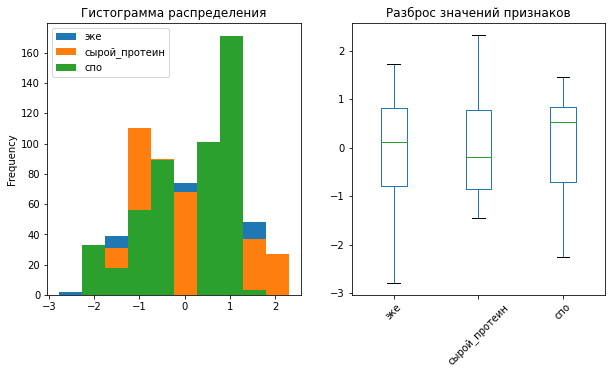

In [23]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

#### Обучение модели и получение предсказания

In [24]:
# инициализирование модели линейной регрессии
model_lr  = LinearRegression()

# обучение модели на тренировочных данных
model_lr.fit(X_train, y_train)

# получение предсказания модели на тестовых данных 
# сохранение результата в переменную predictions
predictions = model_lr.predict(X_test)

# вывод r2 модели
r2 = round(r2_score(y_test, predictions), 2)
print(f'r2 = {r2:.2f}')


r2 = 0.78


#### Анализ остатков

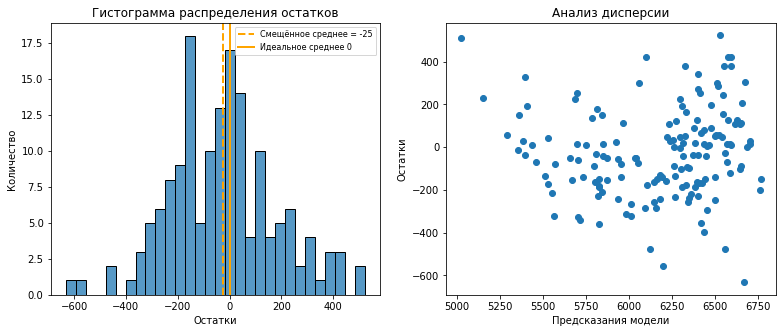

In [25]:
# анализ остатков
residuals = y_test - predictions

# графики по количественным признакам — гистограмма частотности 
# распределения и диаграмма рассеяния

mean_value = residuals.mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,5))
sns.histplot(data = residuals, ax=axes[0], bins = 30)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_ylabel('Количество')
axes[0].set_xlabel('Остатки')
axes[0].axvline(mean_value, linewidth=2, color='orange', alpha=1, linestyle='--', label = 'Смещённое среднее = {:.0f}'.format(mean_value))
axes[0].axvline(0, linewidth=2, color='orange', alpha=1, linestyle='-', label = 'Идеальное среднее 0')
axes[0].legend(fontsize="8")

axes[1].scatter(x=predictions, y=residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()


#### Вывод метрик

In [26]:
mae = round(mean_absolute_error(y_test, predictions), 2)
mse = round(mean_squared_error(y_test, predictions), 2)
rmse = round(mean_squared_error(y_test, predictions, squared=False), 2)


df = pd.DataFrame({'Model, №': ['1'], 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2_SCORE': r2})

display(df.style.set_caption('Метрики качества обученной модели'))


,"Model, №",MAE,MSE,RMSE,R2_SCORE
0,1,164.240000,43887.010000,209.490000,0.780000


#### Промежуточный вывод

Коэффициент детерминации R² показывает, как хорошо модель предсказывает целевой признак по входным.
Для модели № 1 78% разницы в предсказаниях удоя обусловлено влиянием входных признаков, и 22% отклонений в прогнозе удоя не объясняются моделью.

Остатки распределяются бимодально, диаграмма распределения имеет две вершины: на отметке 0 и примерно -150.
Также среднее значение остатков смещено влево относительно нуля и равно -25, из чего следует, что модель чаще даёт предсказания больше истинных значений. 

На второй диаграмме видим, что с ростом значений прогноза удоя увеличивается дисперсия остатков. И также при экстремально низком прогнозе удоя в 5000 кг, разброс выше 400 кг между предсказанием и истинным значением.

Модель №1 работает недостаточно точно, её результаты можно улучшить, введя дополнительные входные признаки. 


### Модель №2

Из диаграмм рассеяния видно, что входной признак `СПО` (отношение сахара к протеину в корме коровы) связан с целевым нелинейно. 
Для значений `СПО` до 0.92 характерен удой до 6000 кг., в то время как для `СПО` 0.92 и выше удой всегда превышает 6000 кг.
Для устранения нелинейности, преобразуем `СПО` в категориальный бинарный признак, использовав границу - 0.92.

Также для исключения нелинейности между входным признаком `ЭКЕ` и целевым признаком Удой введем новый признак `ЭКЕ в квадрате`.

In [27]:
def spr(row):
    try:
        if row['спо'] < 0.92:
            return 0
        else:
            return 1
    except:
        raise ValueError("Несоответствующее значение")
    
ferma_main['спо_выше_92'] = ferma_main.apply(spr, axis=1)

ferma_main['эке_квад'] = ferma_main['эке'] ** 2


# проверка
display(ferma_main.head())


,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,спо_выше_92,эке_квад
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.639999
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.840012
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0,196.000000
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.759995
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0,163.840012


#### Разбивка данных на тренировочную и тестовую выборки.

Заменим признаки 'эке', 'спо' на новые признаки "спо_выше_92" и "эке_квад".

In [28]:
# считывание CSV-файла в датафрейм pandas, сохранение признаков
X = ferma_main.drop(['удой', 'id', 'эке', 'спо', 'жирность', 'белок', 'вкус_молока'], axis=1)
y = ferma_main['удой']

# разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

# вывод необходимых размерностей
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(471, 7)
(157, 7)
(471,)
(157,)


#### Кодирование категориальных признаков с помощью OneHotEncoder.


#### Масштабирование количественных признаков с помощью StandardScaler.

In [29]:
cat_col_names = ['порода', 
                 'тип_пастбища', 
                 'порода_папы_быка',
                 'возраст', 
                 'спо_выше_92']

num_col_names = ['эке_квад', 
                 'сырой_протеин']

#подготовка признаков для масштабирования и кодирования

# создание переменной с экземпляром класса StandardScaler()
scaler = StandardScaler()

# обучение и трансформирование количественных признаков из тренировочной выборки 
X_train_scaled = scaler.fit_transform(X_train[num_col_names])

# преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_col_names])

# создание переменной с экземпляром класса OneHotEncoder()
# включение параметра для избегания появления дамми-ошибок,
# отключение sparse-отображения
encoder = OneHotEncoder(drop='first', sparse=False)

# обучите и трансформируйте категориальные признаки из тренировочной выборки 
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])

# преобразование категориальных признаков в тестовой выборке
X_test_ohe = encoder.transform(X_test[cat_col_names])

# получение от кодировщика список новых столбцов и сохранение в новой переменной 
encoder_col_names = encoder.get_feature_names()

# создание тренировочного и тестового датафреймов из закодированных и отмасштабированных данных

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# вывод пять первых строк из тренировочного датафрейма
display(X_train.head())

,x0_РефлешнСоверинг,x1_Холмистое,x2_Соверин,x3_менее_2_лет,x4_1,эке_квад,сырой_протеин
0,1.0,1.0,1.0,0.0,1.0,1.577968,1.079523
1,1.0,1.0,1.0,1.0,0.0,-1.511438,-0.196920
2,0.0,0.0,0.0,0.0,0.0,0.082269,-1.386085
3,0.0,1.0,0.0,0.0,1.0,-0.150235,0.752230
4,0.0,0.0,0.0,0.0,0.0,-1.102357,0.828598


#### Построение графиков по количественным признакам тренировочного датасета:

**гистограмма частотности распределения и ящик с усами.**

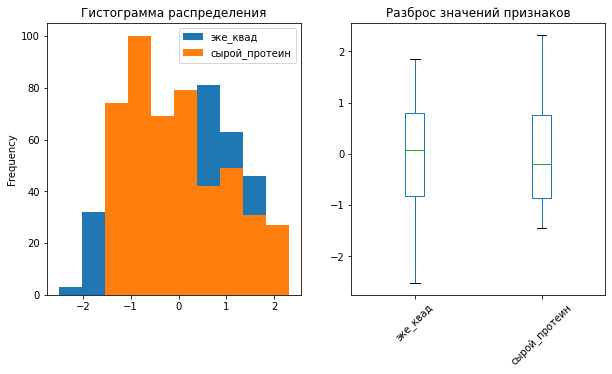

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

#### Обучение модели и получение предсказания

In [31]:
# инициализирование модели линейной регрессии
model_lr  = LinearRegression()

# обучение модели на тренировочных данных
model_lr.fit(X_train, y_train)

# получение предсказания модели на тестовых данных 
# сохранение результата в переменную predictions
predictions = model_lr.predict(X_test)

# вывод r2 модели
r2 = round(r2_score(y_test, predictions), 2)
print(f'r2 = {r2:.2f}')


r2 = 0.82


#### Анализ остатков

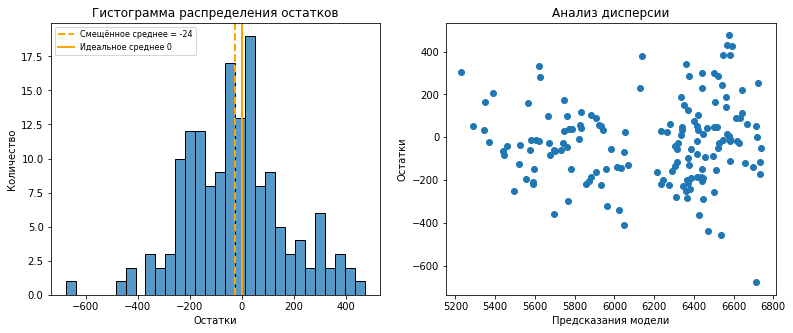

In [32]:
# анализ остатков
residuals = y_test - predictions

# графики по количественным признакам — гистограмма частотности 
# распределения и диаграмма рассеяния

mean_value = residuals.mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,5))
sns.histplot(data = residuals, ax=axes[0], bins = 30)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_ylabel('Количество')
axes[0].set_xlabel('Остатки')
axes[0].axvline(mean_value, linewidth=2, color='orange', alpha=1, linestyle='--', label = 'Смещённое среднее = {:.0f}'.format(mean_value))
axes[0].axvline(0, linewidth=2, color='orange', alpha=1, linestyle='-', label = 'Идеальное среднее 0')
axes[0].legend(fontsize="8")

axes[1].scatter(x=predictions, y=residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

#### Вывод метрик

In [33]:
mae = round(mean_absolute_error(y_test, predictions), 2)
mse = round(mean_squared_error(y_test, predictions), 2)
rmse = round(mean_squared_error(y_test, predictions, squared=False), 2)


df = df.append({'Model, №': '2', 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2_SCORE': r2}, ignore_index=True)

display(df.style.set_caption('Метрики качества обученной модели'))
display(residuals.min(), residuals.max())

,"Model, №",MAE,MSE,RMSE,R2_SCORE
0,1,164.240000,43887.010000,209.490000,0.780000
1,2,149.040000,37030.910000,192.430000,0.820000


-677.4120226780396

475.4583169022917

#### Промежуточный вывод

Метрика R² показывает, что модель № 2 лучше объясняет дисперсию целевого признака, чем модель № 1, - в 82 % случаев.

Остатки все также распределяются бимодально.
Среднее значение остатков стало меньше на 1 пункт и равно -24, из чего следует, что новая модель, также как и прошлая, чаще даёт предсказания больше истинных значений. 

На второй диаграмме видим, что точки стали располагаться чуть плотнее к друг другу по сравнению с первой моделью. Прогнозным значениям модели до 6500 кг соответствует диапазон остатков модели от -400 до 400, при прогнозе выше 6500 кг разброс остатков больше - от -677 до 475.

Показатели модели № 2 превосходят показатели модели № 1 - модель № 2 лучше.



### Модель №3

Для возможного улучшения качества прогноза модели добавим входной признак `Имя Папы` и обучим модель повторно.

Добавление нового признака `Имя Папы` из файла `ferma_dad.csv` в датафрейм `ferma_main.csv`.

In [34]:
ferma_main = (ferma_main
            .merge(ferma_dad, how='left', on='id')
           )

display(ferma_main.head(2), ferma_main.tail(2), ferma_main.shape[0])


,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,спо_выше_92,эке_квад,имя_папы
0,1,5863,14.2,1743,0.89,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.639999,Буйный
1,2,5529,12.8,2138,0.89,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.840012,Соловчик


,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,спо_выше_92,эке_квад,имя_папы
626,628,5746,13.800000,1994,0.89,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,вкусно,более_2_лет,0,190.440002,Барин
627,629,6503,16.200001,2283,0.94,Вис Бик Айдиал,Холмистое,Соверин,3.71,3.076,вкусно,более_2_лет,1,262.440033,Соловчик


628

#### Диаграммы рассеяния признака `Удой, кг` и всех количественных признаков с учётом значения нового входного признака `Имя Папы`.

<Figure size 432x288 with 0 Axes>

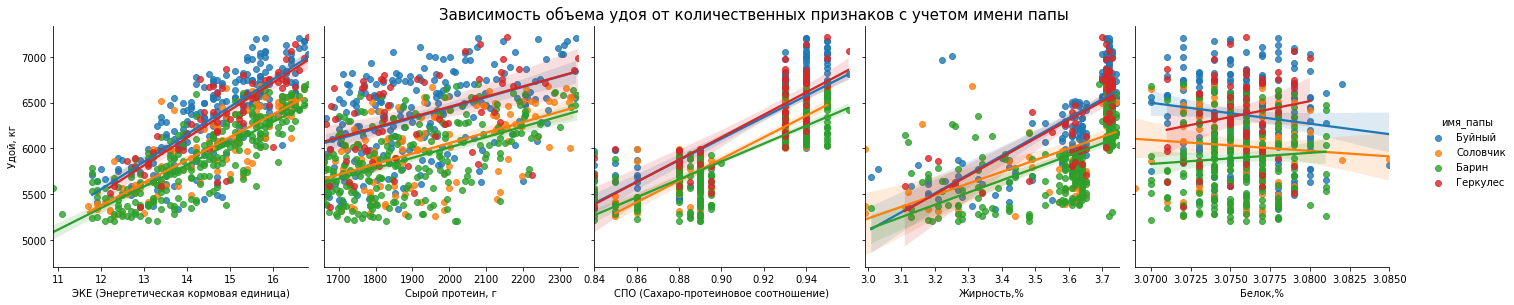

In [35]:
dff = ferma_main[['удой', 'эке', 'сырой_протеин', 'спо', 'жирность', 'белок','имя_папы']]

dff = dff.rename(columns={'удой': 'Удой, кг', \
'эке': 'ЭКЕ (Энергетическая кормовая единица)', \
'сырой_протеин': 'Сырой протеин, г', \
'спо': 'СПО (Сахаро-протеиновое соотношение)', \
'жирность': 'Жирность,%', \
'белок': 'Белок,%'})  

def scatter_plot(n):
    sns.pairplot(data=dff, x_vars=['ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г'
                                  , 'СПО (Сахаро-протеиновое соотношение)', 'Жирность,%', 'Белок,%']
                 , y_vars='Удой, кг', hue=n, height=4, kind = "reg")
                 
for i, col in enumerate(dff[['имя_папы']]):

    plt.figure(i)
    scatter_plot(col)
        
    plt.title( f'Зависимость объема удоя от количественных признаков с учетом имени папы', size = 15, x=-1.5);
    
del dff

Большой удой чаще встречается у буренок, папами которых являются Буйный или Геркулес.

#### Разбивка данных на тренировочную и тестовую выборки.

In [36]:
# считывание CSV-файла в датафрейм pandas, сохранение признаков
X = ferma_main.drop(['удой', 'id', 'эке', 'спо', 'жирность', 'белок', 'вкус_молока'], axis=1)
y = ferma_main['удой']

# разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

# вывод необходимых размерностей
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(471, 8)
(157, 8)
(471,)
(157,)


#### Кодирование категориальных признаков с помощью OneHotEncoder.


#### Масштабирование количественных признаков с помощью StandardScaler.

In [37]:
cat_col_names = ['порода', 
                 'тип_пастбища', 
                 'порода_папы_быка', 
                 'возраст',
                 'имя_папы', 
                 'спо_выше_92']

num_col_names = ['эке_квад', 
                 'сырой_протеин']

#подготовка признаков для масштабирования и кодирования

# создание переменной с экземпляром класса StandardScaler()
scaler = StandardScaler()

# обучение и трансформирование количественных признаков из тренировочной выборки 
X_train_scaled = scaler.fit_transform(X_train[num_col_names])

# преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_col_names])

# создание переменной с экземпляром класса OneHotEncoder()
# включение параметра для избегания появления дамми-ошибок,
# отключение sparse-отображения
encoder = OneHotEncoder(drop='first', sparse=False)

# обучите и трансформируйте категориальные признаки из тренировочной выборки 
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])

# преобразование категориальных признаков в тестовой выборке
X_test_ohe = encoder.transform(X_test[cat_col_names])

# получение от кодировщика список новых столбцов и сохранение в новой переменной 
encoder_col_names = encoder.get_feature_names()

# создание тренировочного и тестового датафреймов из закодированных и отмасштабированных данных

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# вывод пять первых строк из тренировочного датафрейма
display(X_train.head())

,x0_РефлешнСоверинг,x1_Холмистое,x2_Соверин,x3_менее_2_лет,x4_Буйный,x4_Геркулес,x4_Соловчик,x5_1,эке_квад,сырой_протеин
0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.577968,1.079523
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.511438,-0.196920
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.082269,-1.386085
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.150235,0.752230
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.102357,0.828598


#### Построение графиков по количественным признакам тренировочного датасета:

**гистограмма частотности распределения и ящик с усами.**

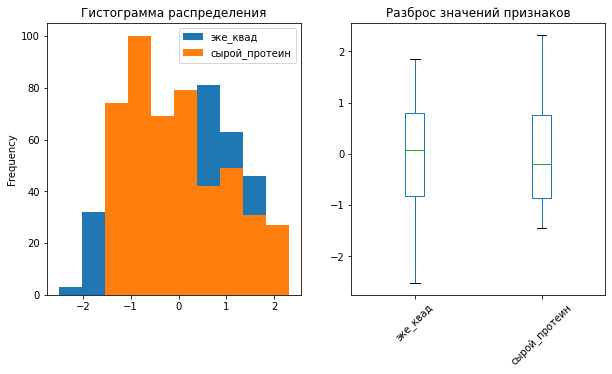

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

#### Обучение модели и получение предсказания

In [39]:
# инициализирование модели линейной регрессии
model_lr  = LinearRegression()

# обучение модели на тренировочных данных
model_lr.fit(X_train, y_train)

# получение предсказания модели на тестовых данных 
# сохранение результата в переменную predictions
predictions = model_lr.predict(X_test)

# вывод r2 модели
r2 = round(r2_score(y_test, predictions), 2)
print(f'r2 = {r2:.2f}')

predictions_best = predictions

r2 = 0.82


#### Анализ остатков

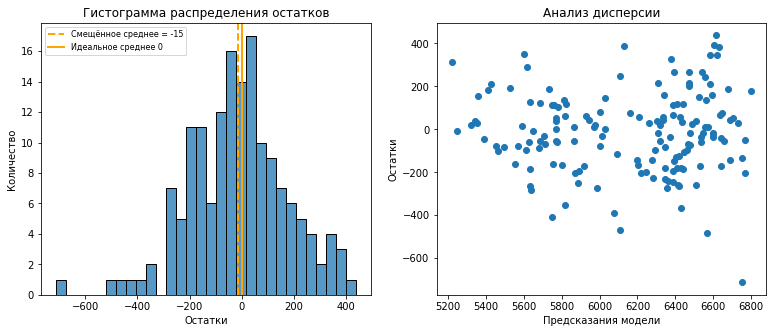

In [40]:
# анализ остатков
residuals = y_test - predictions

# графики по количественным признакам — гистограмма частотности 
# распределения и диаграмма рассеяния

mean_value = residuals.mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,5))
sns.histplot(data = residuals, ax=axes[0], bins = 30)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_ylabel('Количество')
axes[0].set_xlabel('Остатки')
axes[0].axvline(mean_value, linewidth=2, color='orange', alpha=1, linestyle='--', label = 'Смещённое среднее = {:.0f}'.format(mean_value))
axes[0].axvline(0, linewidth=2, color='orange', alpha=1, linestyle='-', label = 'Идеальное среднее 0')
axes[0].legend(fontsize="8")

axes[1].scatter(x=predictions, y=residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

#### Вывод метрик

In [41]:
mae = round(mean_absolute_error(y_test, predictions), 2)
mse = round(mean_squared_error(y_test, predictions), 2)
rmse = round(mean_squared_error(y_test, predictions, squared=False), 2)


df = df.append({'Model, №': '3', 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2_SCORE': r2}, ignore_index=True)

display(df.style.set_caption('Метрики качества обученной модели'))
print(residuals.min())

,"Model, №",MAE,MSE,RMSE,R2_SCORE
0,1,164.240000,43887.010000,209.490000,0.780000
1,2,149.040000,37030.910000,192.430000,0.820000
2,3,146.160000,35673.890000,188.880000,0.820000


-712.794055388079


#### Промежуточный вывод

Метрика R² не изменилась, доля дисперсии удоя, объясненная моделью № 3, - 82 %.

Распределение остатков похоже на нормальное, но с выбросом и смещенным средним.
Среднее значение остатков уменьшилось на 9 пунктов и равно -15, из чего следует, что модель № 3, благодаря новому входному признаку, ошибается более равномерно, но все также чаще дает прогноз выше истичнных значений, т.к. в идеале остатки в сумме должны равняться нулю.

На диаграммах явно выделяется выброс - значение остатков -713 кг. Проверим, в каком случае модель дает максимально неточный прогноз, при построении модели № 5 далее.

Значения метрик `MAE`, `MSE` и `RMSE` показывающих, на какое значение предсказание в среднем отличается от истинного значения, меньше у модели № 3. Это означает, что модель дает более точные предсказания.  

Показатели модели № 3 превосходят показатели моделей № 1 и  № 2 - для прогноза удоя будем использовать модель № 3.



### Модель №4

Для возможного улучшения предсказаний модели добавим исходный признак `ЭКЕ` в дополнение к входному признаку `ЭКЕ в квадрате`. Возможно так модель уловит новые закономерности.

#### Разбивка данных на тренировочную и тестовую выборки.

In [42]:
# считывание CSV-файла в датафрейм pandas, сохранение признаков
X = ferma_main.drop(['удой', 'id', 'спо', 'жирность', 'белок', 'вкус_молока'], axis=1)
y = ferma_main['удой']

# разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

# вывод необходимых размерностей
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(471, 9)
(157, 9)
(471,)
(157,)


#### Кодирование категориальных признаков с помощью OneHotEncoder.


#### Масштабирование количественных признаков с помощью StandardScaler.

In [43]:
cat_col_names = ['порода', 
                 'тип_пастбища', 
                 'порода_папы_быка', 
                 'возраст',
                 'имя_папы', 
                 'спо_выше_92']

num_col_names = ['эке_квад', 
                 'сырой_протеин',
                 'эке']

#подготовка признаков для масштабирования и кодирования

# создание переменной с экземпляром класса StandardScaler()
scaler_4 = StandardScaler()

# обучение и трансформирование количественных признаков из тренировочной выборки 
X_train_scaled = scaler_4.fit_transform(X_train[num_col_names])

# преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler_4.transform(X_test[num_col_names])

# создание переменной с экземпляром класса OneHotEncoder()
# включение параметра для избегания появления дамми-ошибок,
# отключение sparse-отображения
encoder_4 = OneHotEncoder(drop='first', sparse=False)

# обучите и трансформируйте категориальные признаки из тренировочной выборки 
X_train_ohe = encoder_4.fit_transform(X_train[cat_col_names])

# преобразование категориальных признаков в тестовой выборке
X_test_ohe = encoder_4.transform(X_test[cat_col_names])

# получение от кодировщика список новых столбцов и сохранение в новой переменной 
encoder_col_names = encoder_4.get_feature_names()

# создание тренировочного и тестового датафреймов из закодированных и отмасштабированных данных

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# вывод пять первых строк из тренировочного датафрейма
display(X_train.head())

,x0_РефлешнСоверинг,x1_Холмистое,x2_Соверин,x3_менее_2_лет,x4_Буйный,x4_Геркулес,x4_Соловчик,x5_1,эке_квад,сырой_протеин,эке
0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.577968,1.079523,1.502378
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.511438,-0.196920,-1.557270
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.082269,-1.386085,0.125536
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.150235,0.752230,-0.103937
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.102357,0.828598,-1.098323


#### Построение графиков по количественным признакам тренировочного датасета:

**гистограмма частотности распределения и ящик с усами.**

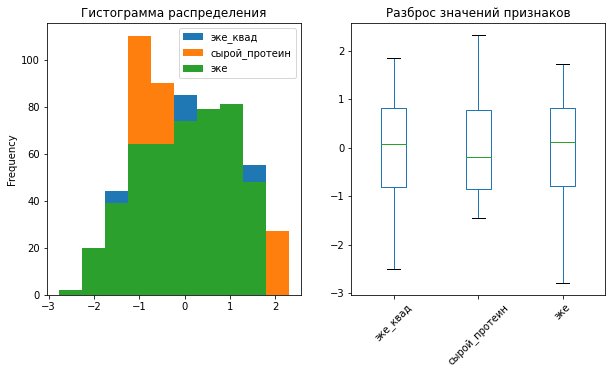

In [44]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

#### Обучение модели и получение предсказания

In [45]:
# инициализирование модели линейной регрессии
model_lr_4  = LinearRegression()

# обучение модели на тренировочных данных
model_lr_4.fit(X_train, y_train)

# получение предсказания модели на тестовых данных 
# сохранение результата в переменную predictions
predictions = model_lr_4.predict(X_test)

# вывод r2 модели
r2 = round(r2_score(y_test, predictions), 2)
print(f'r2 = {r2:.2f}')


r2 = 0.83


#### Анализ остатков

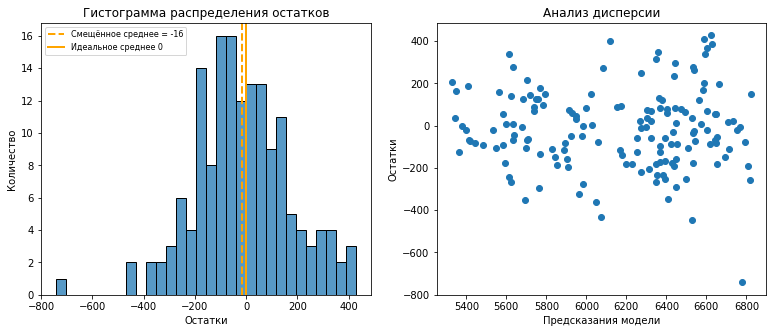

In [46]:
# анализ остатков
residuals = y_test - predictions

# графики по количественным признакам — гистограмма частотности 
# распределения и диаграмма рассеяния

mean_value = residuals.mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,5))
sns.histplot(data = residuals, ax=axes[0], bins = 30)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_ylabel('Количество')
axes[0].set_xlabel('Остатки')
axes[0].axvline(mean_value, linewidth=2, color='orange', alpha=1, linestyle='--', label = 'Смещённое среднее = {:.0f}'.format(mean_value))
axes[0].axvline(0, linewidth=2, color='orange', alpha=1, linestyle='-', label = 'Идеальное среднее 0')
axes[0].legend(fontsize="8")

axes[1].scatter(x=predictions, y=residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

#### Вывод метрик

In [47]:
mae = round(mean_absolute_error(y_test, predictions), 2)
mse = round(mean_squared_error(y_test, predictions), 2)
rmse = round(mean_squared_error(y_test, predictions, squared=False), 2)


df = df.append({'Model, №': '4', 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2_SCORE': r2}, ignore_index=True)

display(df.style.set_caption('Метрики качества обученной модели'))


,"Model, №",MAE,MSE,RMSE,R2_SCORE
0,1,164.240000,43887.010000,209.490000,0.780000
1,2,149.040000,37030.910000,192.430000,0.820000
2,3,146.160000,35673.890000,188.880000,0.820000
3,4,145.510000,34844.110000,186.670000,0.830000


#### Промежуточный вывод

Введение дополнительного признака `ЭКЕ` помогло модели лучше объяснять дисперсию целевого признака на 1 %, но вместе с тем увеличило остатки: среднее значение остатков -16 (было -15 ), максимальный остаток в модели № 3 был -713 кг, в модели № 4  -742 кг.

Поэтому для прогнозирования удоя будем использовать модель № 3.



### Модель №5

Проверим, в каком случае модель выдает самую большую ошибку с разницей в предсказании более 700 кг.

In [48]:
#display(y_test.type())

X_test['пред'] = predictions
X_test['y_test'] = y_test.to_numpy()
X_test['residuals'] = residuals.to_numpy()

display(X_test.query('residuals < -600'))


,x0_РефлешнСоверинг,x1_Холмистое,x2_Соверин,x3_менее_2_лет,x4_Буйный,x4_Геркулес,x4_Соловчик,x5_1,эке_квад,сырой_протеин,эке,пред,y_test,residuals
13,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.316701,1.379542,1.272905,6777.913082,6036,-741.913082


In [49]:
display(ferma_main.query('удой==6036 and имя_папы=="Буйный"'))

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,спо_выше_92,эке_квад,имя_папы
90,92,6036,16.200001,2178,0.93,Вис Бик Айдиал,Холмистое,Айдиал,3.71,3.073,вкусно,более_2_лет,1,262.440033,Буйный


Остаток модели, выглядящий как выброс, дало предсказание удоя для 90й строки: истинное значение целевого признака равно 6036 кг, в то время как модель дала прогноз 6778 кг.

Отобразим в сводной таблице ниже минимальное и медианное значения `удоя`, медианные значения `эке` и `сырого протеина` в разрезе категорий: `спо_выше_92`, `возраст`, `порода_папы_быка`, `тип_пастбища`.

In [50]:
ferma_main.groupby(['спо_выше_92', 'возраст', 'порода_папы_быка', 'тип_пастбища']).agg(
    total_count=('порода', 'count'), 
    минимальный_удой=('удой', 'min'), 
    средний_удой=('удой', 'mean'), 
    средний_эке=('эке', 'mean'), 
    средний_сырой_протеин=('сырой_протеин', 'mean')) 


total_count  \
спо_выше_92 возраст     порода_папы_быка тип_пастбища                
0           более_2_лет Айдиал           Равнинное              28   
                                         Холмистое              33   
                        Соверин          Равнинное              43   
                                         Холмистое              45   
            менее_2_лет Айдиал           Равнинное              20   
                                         Холмистое               7   
                        Соверин          Равнинное              39   
                                         Холмистое              43   
1           более_2_лет Айдиал           Равнинное              93   
                                         Холмистое             136   
                        Соверин          Равнинное              54   
                                         Холмистое              86   
            менее_2_лет Соверин          Равнинное               1   

                                                       минимальный_удой  \
спо_выше_92 возраст     порода_папы_быка тип_пастбища                     
0           более_2_лет Айдиал           Равнинное                 5610   
                                         Холмистое                 5637   
                        Соверин          Равнинное                 5604   
                                         Холмистое                 5601   
            менее_2_лет Айдиал           Равнинное                 5340   
                                         Холмистое                 5242   
                        Соверин          Равнинное                 5213   
                                         Холмистое                 5204   
1           более_2_лет Айдиал           Равнинное                 6005   
                                         Холмистое                 6006   
                        Соверин          Равнинное                 6027   
                                         Холмистое                 6013   
            менее_2_лет Соверин          Равнинное                 6122   

                                                       средний_удой  \
спо_выше_92 возраст     порода_папы_быка тип_пастбища                 
0           более_2_лет Айдиал           Равнинное      5798.928571   
                                         Холмистое      5825.787879   
                        Соверин          Равнинное      5817.697674   
                                         Холмистое      5787.044444   
            менее_2_лет Айдиал           Равнинное      5479.200000   
                                         Холмистое      5418.714286   
                        Соверин          Равнинное      5437.128205   
                                         Холмистое      5422.837209   
1           более_2_лет Айдиал           Равнинное      6475.064516   
                                         Холмистое      6589.985294   
                        Соверин          Равнинное      6318.185185   
                                         Холмистое      6319.081395   
            менее_2_лет Соверин          Равнинное      6122.000000   

                                                       средний_эке  \
спо_выше_92 возраст     порода_папы_быка тип_пастбища                
0           более_2_лет Айдиал           Равнинное       13.696428   
                                         Холмистое       13.187879   
                        Соверин          Равнинное       13.932558   
                                         Холмистое       14.082222   
            менее_2_лет Айдиал           Равнинное       13.195000   
                                         Холмистое       13.242857   
                        Соверин          Равнинное       12.715384   
                                         Холмистое       13.072093   
1           более_2_лет Айдиал           Равнинное       15.180645   
                                         Х

Из данных таблицы видим, что при параметрах буренки с `id`=92, а именно: `спо_выше_92` - да,  `возраст` - более 2 лет, `порода папы быка` - Айдиал, `тип пастбища` - Холмистое, среднее значение удоя = 6590 кг, минимальное значение - 6006 кг. Т.е. у рассматриваемого объекта значение удоя ближе к минимальному. При этом `эке` равен 16.2 единицы, а `сырой протеин` - 2178 грамм, что намного превышают средние значения выбранной группы: 15.2 единицы и 1978 грамм соответственно.
Таким образом, мы имеем не совсем типичный случай сравнительно небольшого объема удоя, при высоких значениях параметров корма, а также, если посмотреть закономерности из диаграмм рассеяния в зависимости от категориальных признаков, где видно, что буренки с аналогичными параметрами как у объекта `id`=92, как правило, дают большой удой.

Удалим строку № 90 и заново обучим модель.

In [51]:
ferma_main = ferma_main.drop(index  = [90],axis = 0).reset_index()


#### Разбивка данных на тренировочную и тестовую выборки.

In [52]:
# считывание CSV-файла в датафрейм pandas, сохранение признаков
X = ferma_main.drop(['удой', 'id', 'спо', 'эке', 'жирность', 'белок', 'вкус_молока'], axis=1)
y = ferma_main['удой']

# разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

# вывод необходимых размерностей
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(470, 9)
(157, 9)
(470,)
(157,)


#### Кодирование категориальных признаков с помощью OneHotEncoder.


#### Масштабирование количественных признаков с помощью StandardScaler.

In [53]:
cat_col_names = ['порода', 
                 'тип_пастбища', 
                 'порода_папы_быка', 
                 'возраст',
                 'имя_папы', 
                 'спо_выше_92']

num_col_names = ['эке_квад', 
                 'сырой_протеин']

#подготовка признаков для масштабирования и кодирования

# создание переменной с экземпляром класса StandardScaler()
scaler_5 = StandardScaler()

# обучение и трансформирование количественных признаков из тренировочной выборки 
X_train_scaled = scaler_5.fit_transform(X_train[num_col_names])

# преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler_5.transform(X_test[num_col_names])

# создание переменной с экземпляром класса OneHotEncoder()
# включение параметра для избегания появления дамми-ошибок,
# отключение sparse-отображения
encoder_5 = OneHotEncoder(drop='first', sparse=False)

# обучите и трансформируйте категориальные признаки из тренировочной выборки 
X_train_ohe = encoder_5.fit_transform(X_train[cat_col_names])

# преобразование категориальных признаков в тестовой выборке
X_test_ohe = encoder_5.transform(X_test[cat_col_names])

# получение от кодировщика список новых столбцов и сохранение в новой переменной 
encoder_col_names = encoder_5.get_feature_names()

# создание тренировочного и тестового датафреймов из закодированных и отмасштабированных данных

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# вывод пять первых строк из тренировочного датафрейма
display(X_train.head())

,x0_РефлешнСоверинг,x1_Холмистое,x2_Соверин,x3_менее_2_лет,x4_Буйный,x4_Геркулес,x4_Соловчик,x5_1,эке_квад,сырой_протеин
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.180416,2.010220
1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.321412,0.095199
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.017928,-1.397869
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.585962,0.371092
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.753110,0.106018


#### Построение графиков по количественным признакам тренировочного датасета:

**гистограмма частотности распределения и ящик с усами.**

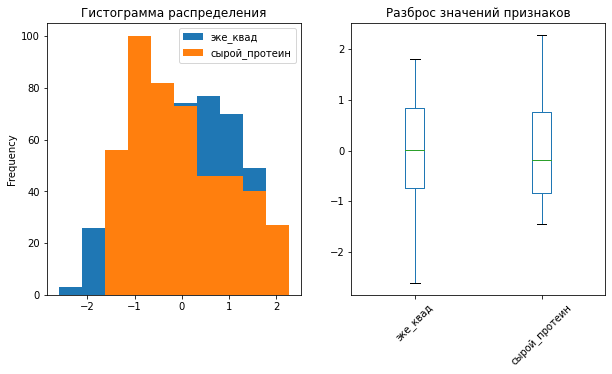

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

#### Обучение модели и получение предсказания

In [55]:
# инициализирование модели линейной регрессии
model_lr_5  = LinearRegression()

# обучение модели на тренировочных данных
model_lr_5.fit(X_train, y_train)

# получение предсказания модели на тестовых данных 
# сохранение результата в переменную predictions
predictions = model_lr_5.predict(X_test)

# вывод r2 модели
r2 = round(r2_score(y_test, predictions), 2)
print(f'r2 = {r2:.2f}')


r2 = 0.85


#### Анализ остатков

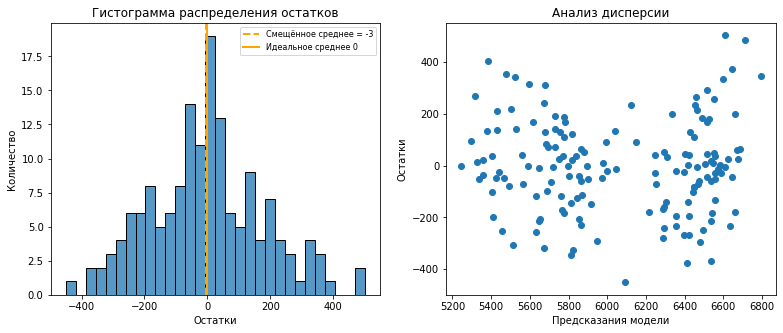

In [56]:
# анализ остатков
residuals = y_test - predictions

# графики по количественным признакам — гистограмма частотности 
# распределения и диаграмма рассеяния

mean_value = residuals.mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,5))
sns.histplot(data = residuals, ax=axes[0], bins = 30)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_ylabel('Количество')
axes[0].set_xlabel('Остатки')
axes[0].axvline(mean_value, linewidth=2, color='orange', alpha=1, linestyle='--', label = 'Смещённое среднее = {:.0f}'.format(mean_value))
axes[0].axvline(0, linewidth=2, color='orange', alpha=1, linestyle='-', label = 'Идеальное среднее 0')
axes[0].legend(fontsize="8")

axes[1].scatter(x=predictions, y=residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

#### Вывод метрик

In [57]:
mae = round(mean_absolute_error(y_test, predictions), 2)
mse = round(mean_squared_error(y_test, predictions), 2)
rmse = round(mean_squared_error(y_test, predictions, squared=False), 2)


df = df.append({'Model, №': '5', 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2_SCORE': r2}, ignore_index=True)

display(df.style.set_caption('Метрики качества обученной модели'))


,"Model, №",MAE,MSE,RMSE,R2_SCORE
0,1,164.240000,43887.010000,209.490000,0.780000
1,2,149.040000,37030.910000,192.430000,0.820000
2,3,146.160000,35673.890000,188.880000,0.820000
3,4,145.510000,34844.110000,186.670000,0.830000
4,5,138.860000,32386.740000,179.960000,0.850000


#### Доверительный интервал прогноза лучшей модели № 3

In [58]:
np.quantile(predictions_best, 0.025) , np.quantile(predictions_best, 0.975)

(5351.3182548355035, 6749.077766440155)

#### Промежуточный вывод

Удаление одной строки из датафрейма помогло улучшить предсказания модели: значения метрик ошибок `MAE`,`MSE`,`RMSE` стали меньше. Коэффициент детерминации R2 показывает, что модель дает лучший прогноз в 85 % случаев, по сравнению с тем, если бы в качестве предсказаний удоя использовалось среднее значение. Также дисперсия остатков стала ниже, что отражается в расчете среднего значения остатков: оно уменьшилось с -15 до -3.

Однако, неоправданное изменение данных в целях улучшения качества модели, когда в целом данные не похожи на выброс, некорректно. В этом случае будет правильным уточнить у заказчика корректность данных.

Поэтому для прогнозирования удоя будем использовать модель №3.

С помощью расчета квантилей предсказанных значений удоя, убрав 2.5% наименьших значений и 2.5% наибольших значений, мы получили интервал, в котором ожидается удой коров с вероятностью 95%.
Доверительным интервалом прогноза лучшей модели № 3 будет диапазон значений от 5351 до 6749 кг удоя.

### Прогнозирование удоя коров для покупки

Добавляем недостающие признаки `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г` и `СПО (Сахаро-протеиновое соотношение)` в датафрейм с информацией о коровах "Экофермы" для покупки `cow_buy`.

Для этого в датасете `ferma_main` вычисляем медианное значение каждого из признаков в разрезе `породы/типа_пастбища/возраста`, увеличиваем полученные значения на 5% и сохраняем в новый датафрейм `df_sub`.

Затем получившиеся величины добавляем в датафрейм `cow_buy` в соответствии с `породой/типом_пастбища/возрастом`.

In [59]:
df_sub = (ferma_main.groupby(['порода_папы_быка', 'тип_пастбища',  'возраст'])
 .agg(эке=('эке', 'median'), сырой_протеин=('сырой_протеин', 'median'), спо=('спо', 'median'))
 .reset_index()
 .sort_values(by=['порода_папы_быка', 'тип_пастбища',  'возраст'], ascending = False))

df_sub['эке'] *= 1.05
df_sub['сырой_протеин'] *= 1.05
df_sub['спо'] *= 1.05

display(df_sub.sort_values(by=['порода_папы_быка', 'тип_пастбища', 'возраст']))

,порода_папы_быка,тип_пастбища,возраст,эке,сырой_протеин,спо
0,Айдиал,Равнинное,более_2_лет,15.644999,1982.400,0.97650
1,Айдиал,Равнинное,менее_2_лет,13.544999,1827.000,0.92400
2,Айдиал,Холмистое,более_2_лет,15.540000,2027.025,0.97650
3,Айдиал,Холмистое,менее_2_лет,14.069999,1873.200,0.93975
4,Соверин,Равнинное,более_2_лет,15.540000,2044.350,0.97650
5,Соверин,Равнинное,менее_2_лет,13.440000,1890.000,0.92400
6,Соверин,Холмистое,более_2_лет,15.959999,2031.750,0.97650
7,Соверин,Холмистое,менее_2_лет,13.755000,1880.550,0.92400


In [60]:
cow_buy = pd.merge(cow_buy, df_sub, left_on=['порода_папы_быка', 'тип_пастбища', 'возраст'], right_on=['порода_папы_быка', 'тип_пастбища', 'возраст'])

display(cow_buy.head(2))
display(cow_buy.tail(2))

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст,эке,сырой_протеин,спо
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.54,2027.025,0.9765
1,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.54,2027.025,0.9765


,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст,эке,сырой_протеин,спо
14,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,15.959999,2031.75,0.9765
15,Вис Бик Айдиал,Холмистое,Соверин,Барин,3.42,3.075,менее_2_лет,13.755000,1880.55,0.9240


По аналогии с данными о текущем стаде фермера, вводим дополнительные признаки `спо_выше_92` и `эке_квад` в датафрейм `cow_buy`.

In [61]:
def spr(row):
    try:
        if row['спо'] < 0.92:
            return 0
        else:
            return 1
    except:
        raise ValueError("Несоответствующее значение")
    
cow_buy['спо_выше_92'] = cow_buy.apply(spr, axis=1)

cow_buy['эке_квад'] = cow_buy['эке'] ** 2


# проверка
display(cow_buy.head(2))


,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст,эке,сырой_протеин,спо,спо_выше_92,эке_квад
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.54,2027.025,0.9765,1,241.491592
1,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.54,2027.025,0.9765,1,241.491592


#### Запись данных в выборку

In [62]:
X_test = cow_buy.drop(['спо', 'эке', 'текущая_жирность', 'текущий_уровень_белок'], axis=1)

display(X_test.sort_values(by=['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы', 'возраст']))

,порода,тип_пастбища,порода_папы_быка,имя_папы,возраст,сырой_протеин,спо_выше_92,эке_квад
8,Вис Бик Айдиал,Равнинное,Соверин,Буйный,более_2_лет,2044.350,1,241.491592
10,Вис Бик Айдиал,Равнинное,Соверин,Буйный,более_2_лет,2044.350,1,241.491592
4,Вис Бик Айдиал,Равнинное,Соверин,Буйный,менее_2_лет,1890.000,1,180.633591
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,более_2_лет,2027.025,1,241.491592
2,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,более_2_лет,2027.025,1,241.491592
15,Вис Бик Айдиал,Холмистое,Соверин,Барин,менее_2_лет,1880.550,1,189.200027
13,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,более_2_лет,2031.750,1,254.721573
14,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,более_2_лет,2031.750,1,254.721573
11,РефлешнСоверинг,Равнинное,Айдиал,Буйный,более_2_лет,1982.400,1,244.765976
7,РефлешнСоверинг,Равнинное,Соверин,Барин,более_2_лет,2044.350,1,241.491592


#### Кодирование категориальных признаков с помощью OneHotEncoder.


#### Масштабирование количественных признаков с помощью StandardScaler.

In [63]:
cat_col_names = ['порода', 
                 'тип_пастбища', 
                 'порода_папы_быка',
                 'возраст',
                 'имя_папы', 
                 'спо_выше_92']

num_col_names = ['эке_квад', 
                 'сырой_протеин']


# преобразование количественных признаков
X_test_scaled = scaler.transform(X_test[num_col_names])

# преобразование категориальных признаков
X_test_ohe = encoder.transform(X_test[cat_col_names])

# получение от кодировщика список новых столбцов и сохранение в новой переменной 
encoder_col_names = encoder.get_feature_names()

# создание датафреймов из закодированных и отмасштабированных данных

X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединяем все преобразованные данные в датафрейм
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# вывод пять первых строк из датафрейма
display(X_test.head())

,x0_РефлешнСоверинг,x1_Холмистое,x2_Соверин,x3_менее_2_лет,x4_Буйный,x4_Геркулес,x4_Соловчик,x5_1,эке_квад,сырой_протеин
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.758785,0.555990
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.758785,0.555990
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.758785,0.555990
3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.758785,0.555990
4,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,-0.862034,-0.191465


#### Получение прогноза модели

**добавление предсказания в данные с коровами "Экофермы"**

In [64]:
predictions = model_lr.predict(X_test)
cow_buy['удой'] = predictions
display(cow_buy.sort_values(by='удой', ascending=False))


,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст,эке,сырой_протеин,спо,спо_выше_92,эке_квад,удой
9,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,15.540000,2044.350,0.97650,1,241.491592,6660.018394
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.540000,2027.025,0.97650,1,241.491592,6647.091143
2,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.68,3.046,более_2_лет,15.540000,2027.025,0.97650,1,241.491592,6647.091143
1,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.540000,2027.025,0.97650,1,241.491592,6630.261232
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет,15.540000,2027.025,0.97650,1,241.491592,6630.261232
8,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.540000,2044.350,0.97650,1,241.491592,6613.349217
10,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.34,3.069,более_2_лет,15.540000,2044.350,0.97650,1,241.491592,6613.349217
11,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.644999,1982.400,0.97650,1,244.765976,6580.812447
13,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.959999,2031.750,0.97650,1,254.721573,6440.438459
14,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,15.959999,2031.750,0.97650,1,254.721573,6440.438459


#### Промежуточный вывод

Полученный прогноз удоя буренок "Экофермы" выглядит оптимистичным: 15 из 16 коров в среднем будут приносить удой не менее 6000 кг молока в год.

Также все предсказанные значения удоя входят в доверительный интервал прогноза лучшей модели. 

## Обучение модели логистической регрессии


Представим в качестве целевого признака новый столбец `вкусное_молоко` в виде закодированных значений из колонки `вкус_молока`: 0 - не вкусно, 1 - вкусно.

In [65]:
def milk_taste(row):
    try:
        if row['вкус_молока'] == 'вкусно':
            return 1
        else:
            return 0
    except:
        raise ValueError("Несоответствующее значение")
    
ferma_main['вкусное_молоко'] = ferma_main.apply(milk_taste, axis=1)

display(ferma_main.head(3))

,index,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,спо_выше_92,эке_квад,имя_папы,вкусное_молоко
0,0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.639999,Буйный,1
1,1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.840012,Соловчик,1
2,2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0,196.000000,Барин,0


### Модель №1

#### Разбивка данных на тренировочную и тестовую выборки.


#### Кодирование категориальных признаков с помощью OneHotEncoder.


#### Масштабирование количественных признаков с помощью StandardScaler.

In [66]:
# считывание CSV-файла в датафрейм pandas, сохранение признаков
X = ferma_main.drop(['id', 'удой', 'эке', 'спо', 'вкус_молока', 'вкусное_молоко'], axis=1)
y = ferma_main['вкусное_молоко']

# разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)


cat_col_names = ['порода', 
                 'тип_пастбища', 
                 'порода_папы_быка', 
                 'возраст',
                 'имя_папы', 
                 'спо_выше_92']

num_col_names = ['эке_квад', 
                 'сырой_протеин',
                 'жирность', 
                 'белок']
                
# создание переменной с экземпляром класса StandardScaler()
scaler = StandardScaler()

# обучение и трансформирование количественных признаков из тренировочной выборки 
X_train_scaled = scaler.fit_transform(X_train[num_col_names])

# преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_col_names])

# создание переменной с экземпляром класса OneHotEncoder()
# включение параметра для избегания появления дамми-ошибок,
# отключение sparse-отображения
encoder = OneHotEncoder(drop='first', sparse=False)

# обучите и трансформируйте категориальные признаки из тренировочной выборки 
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])

# преобразование категориальных признаков в тестовой выборке
X_test_ohe = encoder.transform(X_test[cat_col_names])

# получение от кодировщика список новых столбцов и сохранение в новой переменной 
encoder_col_names = encoder.get_feature_names()

# создание тренировочного и тестового датафреймов из закодированных и отмасштабированных данных

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# вывод пять первых строк из тренировочного датафрейма
display(X_train.head())


,x0_РефлешнСоверинг,x1_Холмистое,x2_Соверин,x3_менее_2_лет,x4_Буйный,x4_Геркулес,x4_Соловчик,x5_1,эке_квад,сырой_протеин,жирность,белок
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.180416,2.010220,0.774536,1.304940
1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.321412,0.095199,-1.718833,0.907226
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.017928,-1.397869,-2.716179,1.304940
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.585962,0.371092,0.712201,1.702654
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.753110,0.106018,0.649867,0.111703


#### Обучение модели и получение предсказания

In [67]:
clf = LogisticRegression()

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#### Вывод метрик и матрицы ошибок

,"Model, №",accuracy,recall,precision
0,1,0.617834,0.782609,0.642857


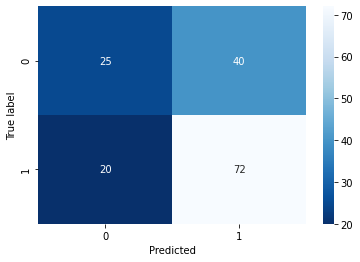

In [68]:
recall = recall_score(y_test, y_pred) 
precision = precision_score(y_test, y_pred) 
accuracy = accuracy_score(y_pred, y_test)

df = pd.DataFrame({'Model, №': ['1'], 'accuracy': accuracy, 'recall': recall, 'precision': precision})

display(df.style.set_caption('Метрики качества обученной модели'))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');
plt.ylabel('True label')
plt.xlabel('Predicted'); 


#### Промежуточный вывод

Метрика `accuracy` показывает, что модель верно предсказывает вкус молока почти в 62 % случаев.
Точность, с которой модель присвоила объектам класс 1, отражает метрика `precision`. Она равна 64 %.
Обратная `precision` метрика `recall` показывает, что в 78 % случаев модель классификации присвоила класс 1 объектам верно.

В случае предсказания вкуса молока, более критичной является ошибка первого рода - `False Positive`, когда модель ошибочно предсказывает, что молоко вкусное. 
В матрице ошибок обученной модели на тестовых данных - 40 случаев `False Positive`.


### Модель №2

Для возможного улучшения качества модели преобразуем признак `Жирность` в бинарный категориальный признак, использовав границу 3.69.


In [69]:
def fat(row):
    try:
        if row['жирность'] < 3.69:
            return 0
        else:
            return 1
    except:
        raise ValueError("Несоответствующее значение")
    
ferma_main['высокая_жирность'] = ferma_main.apply(fat, axis=1)

# проверка
display(ferma_main.head(2))


,index,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,спо_выше_92,эке_квад,имя_папы,вкусное_молоко,высокая_жирность
0,0,1,5863,14.2,1743,0.89,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.639999,Буйный,1,0
1,1,2,5529,12.8,2138,0.89,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.840012,Соловчик,1,0


#### Разбивка данных на тренировочную и тестовую выборки.


#### Кодирование категориальных признаков с помощью OneHotEncoder.


#### Масштабирование количественных признаков с помощью StandardScaler.

In [70]:
# считывание CSV-файла в датафрейм pandas, сохранение признаков
X = ferma_main.drop(['id', 'удой', 'эке', 'спо', 'вкус_молока', 'вкусное_молоко', 'жирность'], axis=1)
y = ferma_main['вкусное_молоко']

# разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)


cat_col_names = ['порода', 
                 'тип_пастбища', 
                 'порода_папы_быка', 
                 'возраст',
                 'имя_папы', 
                 'спо_выше_92',
                 'высокая_жирность']

num_col_names = ['эке_квад', 
                 'сырой_протеин',
                 'белок']
                

#подготовка признаков для масштабирования и кодирования

# создание переменной с экземпляром класса StandardScaler()
scaler = StandardScaler()

# обучение и трансформирование количественных признаков из тренировочной выборки 
X_train_scaled = scaler.fit_transform(X_train[num_col_names])

# преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_col_names])

# создание переменной с экземпляром класса OneHotEncoder()
# включение параметра для избегания появления дамми-ошибок,
# отключение sparse-отображения
encoder = OneHotEncoder(drop='first', sparse=False)

# обучите и трансформируйте категориальные признаки из тренировочной выборки 
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])

# преобразование категориальных признаков в тестовой выборке
X_test_ohe = encoder.transform(X_test[cat_col_names])

# получение от кодировщика список новых столбцов и сохранение в новой переменной 
encoder_col_names = encoder.get_feature_names()

# создание тренировочного и тестового датафреймов из закодированных и отмасштабированных данных

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# вывод пять первых строк из тренировочного датафрейма
display(X_train.head())


,x0_РефлешнСоверинг,x1_Холмистое,x2_Соверин,x3_менее_2_лет,x4_Буйный,x4_Геркулес,x4_Соловчик,x5_1,x6_1,эке_квад,сырой_протеин,белок
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.180416,2.010220,1.304940
1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.321412,0.095199,0.907226
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.017928,-1.397869,1.304940
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.585962,0.371092,1.702654
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.753110,0.106018,0.111703


#### Обучение модели и получение предсказания

In [71]:
clf = LogisticRegression()

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#### Вывод метрик и матрицы ошибок

,"Model, №",accuracy,recall,precision
0,1,0.617834,0.782609,0.642857
1,2,0.624204,0.771739,0.651376


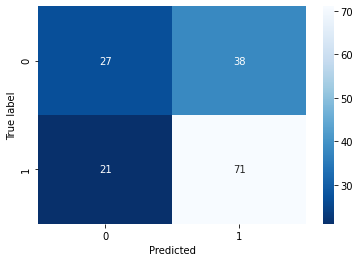

In [72]:
recall = recall_score(y_test, y_pred) 
precision = precision_score(y_test, y_pred) 
accuracy = accuracy_score(y_pred, y_test)


df = df.append({'Model, №': '2', 'accuracy': accuracy, 'recall': recall, 'precision': precision}, ignore_index=True)

display(df.style.set_caption('Метрики качества обученной модели'))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');
plt.ylabel('True label')
plt.xlabel('Predicted'); 

#### Промежуточный вывод

Метрика `accuracy` показывает, что модель стала предсказывать на 0,6 % точнее.
`precision` увеличилась на 1 % и равна 65 %.
Обратная `precision` метрика `recall` напротив уменьшилась на 1 % и равна 77 % .

В случае предсказания вкуса молока, более критичной является ошибка первого рода - `False Positive`, в матрице ошибок модели № 2 - 38 случаев `False Positive`, на 2 меньше по сравнению с моделью № 1.

В связи с тем, что метрики качества модели № 2 чуть лучше, воспользуемся данной моделью для предсказания вкуса молока.


### Изменение порога принадлежности к классам

Необходимо свести к минимуму ошибки первого рода, чтобы ошибочно не предсказать, что молоко вкусное, т.к. для заказчика важно отобрать коров для покупки именно по критерию вкуса. Вместе с этим, в данной кейсе неважна ошибка в предсказании, что молоко невкусное.

Таким образом, увеличим `precision`, изменив порог принадлежности к классам ниже. С ростом `precision` уменьшится значение `recall`.


In [73]:
def cost(y_valid,y_pred_):
    if y_pred_ > y_valid:
        return 1
    else:
        return 0 
    
y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

    
thresholds = [round(i,2) for i in np.linspace(0.5,1,num = 12,endpoint=False)]

values = []
columns = []
for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'] = data['y_proba'].apply(lambda x: 1 if x>= i else 0)
    data['check'] = data.apply(lambda x : cost(x.y_valid,x.y_pred_), 1)
    values.append(data['check'].sum())

costs = pd.DataFrame(zip(columns, values),columns = ['Порог', 'False_Positive']) 

display(costs)

,Порог,False_Positive
0,y_pred_0.5,38
1,y_pred_0.54,33
2,y_pred_0.58,27
3,y_pred_0.62,18
4,y_pred_0.67,11
5,y_pred_0.71,7
6,y_pred_0.75,4
7,y_pred_0.79,2
8,y_pred_0.83,0
9,y_pred_0.88,0


Итоговый порог для минимизации ошибок первого рода - 0,79.

Откалибруем модель с учетом данного порога.

precision:  0.867
recall:  0.141


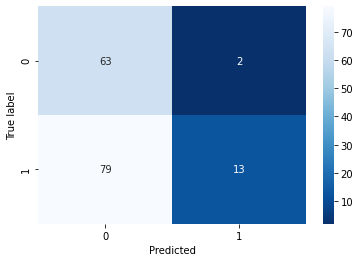

In [74]:
y_pred = clf.predict_proba(X_test)[:,1] >= 0.79

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');
plt.ylabel('True label')
plt.xlabel('Predicted'); 

precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred) 

print('precision: ',round(precision,3))
print('recall: ',round(recall ,3))

Из матрицы ошибок видим, что изменение порога принадлежности к классам свело ошибки "False Positive" к 2.
`Precision` увеличился до 87 %, `recall`, напротив, уменьшился до 14%.

С помощью откалиброванной модели спрогнозируем вкус молока.

### Прогнозирование вкуса молока

Превратим числовой признак `текущая_жирность` в категориальный бинарный, использовав границу 3.69.

In [75]:
def fat(row):
    try:
        if row['текущая_жирность'] < 3.69:
            return 0
        else:
            return 1
    except:
        raise ValueError("Несоответствующее значение")
    
cow_buy['высокая_жирность'] = cow_buy.apply(fat, axis=1)

# проверка
display(cow_buy.head(2))


,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст,эке,сырой_протеин,спо,спо_выше_92,эке_квад,удой,высокая_жирность
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.54,2027.025,0.9765,1,241.491592,6647.091143,0
1,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.54,2027.025,0.9765,1,241.491592,6630.261232,0


#### Подготовка выборки.


#### Кодирование категориальных признаков с помощью OneHotEncoder.


#### Масштабирование количественных признаков с помощью StandardScaler.

In [76]:
X_test = cow_buy.drop(['удой', 'эке', 'спо', 'текущая_жирность'], axis=1)


cat_col_names = ['порода', 
                 'тип_пастбища', 
                 'порода_папы_быка', 
                 'возраст',
                 'имя_папы', 
                 'спо_выше_92',
                 'высокая_жирность']

num_col_names = ['эке_квад', 
                 'сырой_протеин',
                 'текущий_уровень_белок']

# преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_col_names])

# преобразование категориальных признаков в тестовой выборке
X_test_ohe = encoder.transform(X_test[cat_col_names])

# получение от кодировщика список новых столбцов и сохранение в новой переменной 
encoder_col_names = encoder.get_feature_names()

# создание тренировочного и тестового датафреймов из закодированных и отмасштабированных данных

X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# вывод пять первых строк из тренировочного датафрейма
display(X_test.head())


,x0_РефлешнСоверинг,x1_Холмистое,x2_Соверин,x3_менее_2_лет,x4_Буйный,x4_Геркулес,x4_Соловчик,x5_1,x6_1,эке_квад,сырой_протеин,текущий_уровень_белок
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.702739,0.528107,0.111703
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.702739,0.528107,-5.854387
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.702739,0.528107,-11.820571
3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.702739,0.528107,-4.263436
4,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,-0.937953,-0.213152,2.100463


#### Получение предсказания модели

**добавление предсказания в данные с коровами "Экофермы"**

In [77]:
y_pred = (clf.predict_proba(X_test)[:,1] >= 0.79).astype(int)

cow_buy['вкусное_молоко'] = y_pred

display(cow_buy.sort_values(by=['удой', 'вкусное_молоко'], ascending=False))


,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст,эке,сырой_протеин,спо,спо_выше_92,эке_квад,удой,высокая_жирность,вкусное_молоко
9,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,15.540000,2044.350,0.97650,1,241.491592,6660.018394,1,0
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.540000,2027.025,0.97650,1,241.491592,6647.091143,0,0
2,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.68,3.046,более_2_лет,15.540000,2027.025,0.97650,1,241.491592,6647.091143,0,0
1,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.540000,2027.025,0.97650,1,241.491592,6630.261232,0,0
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет,15.540000,2027.025,0.97650,1,241.491592,6630.261232,0,0
8,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.540000,2044.350,0.97650,1,241.491592,6613.349217,0,0
10,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.34,3.069,более_2_лет,15.540000,2044.350,0.97650,1,241.491592,6613.349217,0,0
11,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.644999,1982.400,0.97650,1,244.765976,6580.812447,0,0
13,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.959999,2031.750,0.97650,1,254.721573,6440.438459,1,0
14,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,15.959999,2031.750,0.97650,1,254.721573,6440.438459,1,0


#### Промежуточный вывод

Полученный прогноз вкуса молока: в "Экоферме" нет коров, которые бы приносили вкусное молоко по критериям фермера.


Также можно сделать вывод, что качество модели классификации достаточно низкое. Для того, чтобы модель была точнее, и при минимизации критичной ошибки также сохраняла хорошую полноту, необходимо добавить в модель новые входные признаки, которые бы помогли модели точнее предсказывать вкус молока.

## Итоговые выводы

Приведем датафрейм с коровами "Экофермы" в привычный для заказчика вид, немного скорректировав названия колонок и добавив прогнозы вкуса молока и удоя коров.

In [78]:
cow_buy['вкусное_молоко'] = np.where(cow_buy['вкусное_молоко'] == 0, 'не вкусно', 'вкусно')

cow_buy = cow_buy.rename(columns={'порода': 'Порода', \
'тип_пастбища': 'Тип пастбища', \
'порода_папы_быка': 'Порода папы быка', \
'имя_папы': 'Имя папы', \
'текущая_жирность': 'Текущая_жирность,%', \
'текущий_уровень_белок': 'Текущий_уровень_белок,%', \
'возраст': 'Возраст', \
'удой': 'Удой, кг', \
'вкусное_молоко': 'Вкус молока'})

cow_buy = cow_buy.drop(['эке', 'сырой_протеин', 'спо', 'спо_выше_92', 'эке_квад', 'высокая_жирность'], axis=1)


In [79]:
display(cow_buy.sort_values(by=['Удой, кг', 'Вкус молока'], ascending=False))


,Порода,Тип пастбища,Порода папы быка,Имя папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст,"Удой, кг",Вкус молока
9,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,6660.018394,не вкусно
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6647.091143,не вкусно
2,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.68,3.046,более_2_лет,6647.091143,не вкусно
1,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,6630.261232,не вкусно
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет,6630.261232,не вкусно
8,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6613.349217,не вкусно
10,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.34,3.069,более_2_лет,6613.349217,не вкусно
11,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6580.812447,не вкусно
13,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,6440.438459,не вкусно
14,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,6440.438459,не вкусно


**Рекомендации по улучшению качества моделей**

`Модель линейной регресии` имеет достаточно хорошее качество: метрика качества R2 объясняет 82 % разницы в предсказаниях удоя  влиянием входных признаков. Среднее значение остатков, равным -15 говорит о том, что модель чаще завышает прогноз, чем занижает. Качество модели можно улучшить добавлением новых входных признаков.

`Модель классификации` имеет очень низкое качество: точность модели, отраженная метрикой accuracy, равна 65 %. 
Только один из текущих входных признаков модели имеет с целевым заметную коррреляцию, 7 признаков имеют незначительную связь с целевым. Для улучшения качества модели необходимо вводить новые входные признаки, которые бы имели высокую корреляцию с целевым признаком.

**Вывод для заказчика:**

Прогноз удоя и вкуса молока коров показал, что из 16 коров, предложенных "Экофермой", удой выше 6000 кг молока в год принесут 15 коров, но при этом молоко не будет вкусным ни у одной коровы по текущим критериям фермера.

**Рекомендации для заказчика**
1. Рассмотреть для покупки других коров "Экофермы" или найти другого поставщика.
2. Проверить данные о текущем стаде, где корова с хорошими характеристиками дает сравнительно низкий удой. Возможно в данные закралась ошибка.
3. Ослабить критерии для прогнозирования вкуса молока.



*Способы улучшения качества регрессионной модели, использованные в проекте:*

1. Преобразование входного признака `СПО (Сахаро-протеиновое соотношение)` в категориальный бинарный признак для устранения нелинейности с целевым признаком.
2. Введение нового признака: `Имя папы`.
3. Возведение в квадрат значений признака `ЭКЕ (Энергетическая кормовая единица)` для исключения нелинейности с целевым признаком.

Результаты регрессионной модели возможно улучшить путем добавления новых входных признаков или данных о других коровах.

При анализе рисков или экономических расчётов необходимо учитывать, ошибки какого рода необходимо минимизировать: если необходимо свести к минимуму ошибки первого рода, как в данной задаче, необходимо повышать значение метрики `precision`, если же наоборот критичными являются ошибки второго рода - необходимо увеличить метрику `recall`.



Проект включает следующие этапы: 
1. **Загрузка и первичное знакомство** с общей информацией о данных текущего стада фермера и данными "Экофремы": количество строк и столбцов, типы данных, наличие пропусков, преобразование названий колонок датасетов;


2. **Предобработка данных:**
 - были удалены явные дубликаты: суммарно 9 строк;
 - обработаны неявные дубликаты в столбцах с информацией о типах пастбищ и наименованиях пород;
 - преобразованы типы данных.
 
 
3. **Исследовательский анализ данных:**
- Удален выброс аномально большого удоя в стаде фермера - 45 тыс кг.
- Статистики, гистограммы, диаграммы размаха "ящик с усами", круговые диаграммы показали: 
    - в стаде фермера:
        - 628 коров, в среднем приносящие 6133 кг молока в год, 86 % буренок дают молоко жирностью от 3,4 до 3,75 %%, среднее содержание белка -  3,076 %.
        - средние показатели: питательности корма `Энергетическая кормовая единица` - 14,7 единиц; содержания `сырого протеина` в корме - 1888 г.
        - признак `СПО (Сахаро-протеиновое соотношение)` делит стадо на 3 группы: 
        1. показатель от 0,84 до 0,86 - 67 коров;
        2. 0,88-0,9 - 191 корова;
        3. 0,93-0,96 - 370 коров.
    - В стаде "ЭкоФермы"  - 16 коров для продажи, средние показатели молока:
        - `текущая жирность` - 3,59 %. 
        - `текущий уровень белка` - 3,073 %.
    - Все коровы представлены двумя `породами`: "Вис Бик Айдиал" и "Рефлешн Соверинг". В стаде фермера 59 % - "Вис Бик Айдиал", в "ЭкоФерме" - разделение 50 на 50.
    - Ландшафт лугов - равнинный или холмистый, в "ЭкоФерме" - разделение 50 на 50, у коровок фермера - 56 % холмистые пастбища.
    - `Порода папы быка` у фермера 50 % "Айдиал" и 50% "Соверин", в "ЭкоФерме" "Соверин" преобладает с долей 62 %.
    - `Возраст`: в стаде фермера взрослых буренок (более 2 лет) - 82 %, в "ЭкоФерме" - 69 %.
    - Коровы происходят от 4 быков, в стаде фермера и "ЭкоФерме" представлены соотвественно: Барин - 38 % и 12 %, Буйный - 34 % и 44 %, Соловчик - 18 % и 12 %, Геркулес - 10 % и 31 %.
    - По критериям фермера 59 % буренок дают `вкусное молоко`.
    
    
4. **Корреляционный анализ**
    - Линейная связь между целевым признаком `Удой, кг` и входными признаками, согласно шкале Чеддока:
        - Высокая: `ЭКЕ (Энергетическая кормовая единица)` (коэффициент корреляции Пирсона  `0.77`), `СПО (Сахаро-протеиновое соотношение)` (ККП  `0.81`);
        - Заметная: `Жирность,%` (ККП  `0.6`);
        - Умеренная: `Сырой протеин, г` (ККП  `0.45`);
        - Отсутствует: `Белок,%`.

    - Мультиколлинеарность между входными признаками не наблюдается: отсутствуют признаки, коррелирующие с целевым на уровне от 0,9.

    - Диаграммы рассеяния между `удоем` и количественными признаками с учетом категориальных признаков показали:
        - Зависимость `удоя` от `энергетической кормовой единицы` похожа на линейную, но заметна небольшая кривизна, которую планируется "выпрямить" путем возведения значений признака `энергетической кормовой единицы` в квадрат.
        - Более хаотичное расположение точек - слабая корреляция между признаком `Сырой протеин, г` и `удой`.
        - Для `СПО (Сахаро-протеиновое соотношение)` до 0.92 характерен удой до 6000 кг, для `СПО` 0.92 и выше - удой всегда превышает 6000 кг.
        - Для 80 % коров характерна `жирность` молока от 3,6 - 3,7 %%. Для значений признака от 3,55 до 3,65 %% характерен удой от 5380 до 6513 кг молока в год, с жирностью молока от 3,69 % и выше, за исключением 7 коров,  характерен удой от 6159 до 7222 кг молока в год.
        - Между признаками `Белок, %` и `Удой, кг` отсутствует взаимосвязь: это видно на диаграммах, где для случайного значения белка удой варьируется на всем диапазоне допустимых значений.
        - Буренки старше 2 лет в большинстве случаев дают удой выше, а также удой от 6000 кг молока, за исключением одной коровы возрастом менее 2 лет, дают только коровы старше 2 лет. 
        - Коровы, произошедшие от `породы папы быка` "Айдиал", чаще приносят удой больше, чем у "Соверин". Удой молока свыше 6700 кг дают только коровы с папой быком "Айдиал". 
        - В распределении внутри категорий признаков `Порода`, `Тип пастбища`, `Вкус молока` заметных отличий нет. 
        

5. **Обучение модели линейной регрессии**

Были обучены пять моделей линейной регрессии: по мере обучения вводились новые или преобразовывались имеющиеся входные признаки. 
Лучшие результаты показала модель № 3, на основе которой был спрогнозирован удой:
- метрика `R²` отражает точность прогнозов на 82 %, 
- значения метрик `MAE`, `MSE` и `RMSE` показывающих, на какое значение предсказание в среднем отличается от истинного значения, составляют соответственно: 146 кг, 35673 кг² и 189 кг.
- распределение остатков модели похоже на нормальное, но с выбросом и смещенным средним.
- среднее значение остатков равно -15, модель ошибается более равномерно, чем другие модели, но все также чаще дает прогноз выше истичнных значений.

На этапе анализа остатков был замечен выброс -713 кг. 
Удаление одной строки из датафрейма, при котором модель совершила наибольшую ошибку, улучшило предсказания модели: значения метрик ошибок `MAE`,`MSE`,`RMSE` стали меньше. Коэффициент детерминации R2 показывает, что модель дает верный прогноз в 85 % случаев. Среднее значение остатков сократилось с -15 до -3.

Однако, неоправданное изменение данных в целях улучшения качества модели, когда в целом данные не похожи на выброс, некорректно. В этом случае будет правильным уточнить у заказчика корректность данных.

Поэтому выбор был сделан в пользу модели № 3.
Доверительный интервал прогноза лучшей модели с вероятностью 95%, выбранный путем расчета квантилей предсказанных значений удоя, равен диапазону значений от 5351 до 6749 кг удоя.
Полученный прогноз удоя буренок "Экофермы": 15 из 16 коров в среднем будут приносить удой не менее 6000 кг молока в год.
Предсказанные значения входят в доверительный интервал прогноза лучшей модели. 


6. **Обучение модели логистической регрессии**

Были обучены две модели логистической регрессии: по мере обучения был преобразован признак `Жирность` из числового в бинарный категориальный. 


- Метрика `accuracy` показывает, что модель предсказывает верно в 62 % случаев.
- Точность, с которой модель присвоила объектам класс 1, отражает метрика `precision`. Она равна 65 %.
- Обратная `precision` метрика `recall` показывает, что в 77 % случаев модель классификации присвоила класс 1 объектам верно.
- В случае предсказания вкуса молока, более критичной является ошибка первого рода - `False Positive`, в матрице ошибок модели № 2 - 38 случаев `False Positive`.
- Для сведения к нулю ошибок первого рода, т.к. для заказчика важно отобрать коров для покупки именно по критерию вкуса, был увеличен `precision` до 100 % и уменьшен `recall` до 9%, путем изменения порога принадлежности к классам до 0,822.
- С помощью откалиброванной модели был спрогнозирован вкус молока: в настоящий момент в "Экоферме" нет коров, которые бы приносили вкусное молоко по критериям фермера.
